In [6]:
import json
import joblib
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import HistGradientBoostingRegressor
import sys
!{sys.executable} -m pip install scikit-learn


In [7]:
import sys
!{sys.executable} -m pip install scikit-learn


In [8]:
import warnings


In [80]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [9]:
import sys
!{sys.executable} -m pip install matplotlib


In [11]:

#load Raw data and print columns
import pandas as pd
PATH = r"C:\AVM Project\DATA\Assessment_Parcels_20251003 (1).csv"

cols_only = pd.read_csv(PATH, nrows=0)
print(list(cols_only.columns))


['Roll Number', 'Street Number', 'Unit Number', 'Street Suffix', 'Street Direction', 'Street Name', 'Street Type', 'Full Address', 'Neighbourhood Area', 'Market Region', 'Total Living Area', 'Building Type', 'Basement', 'Basement Finish', 'Year Built', 'Rooms', 'Air Conditioning', 'Fire Place', 'Attached Garage', 'Detached Garage', 'Pool', 'Number Floors (Condo)', 'Property Use Code', 'Assessed Land Area', 'Water Frontage Measurement', 'Sewer Frontage Measurement', 'Property Influences', 'Zoning', 'Total Assessed Value', 'Total Proposed Assessment Value', 'Assessment Date', 'Detail URL', 'Current Assessment Year', 'Property Class 1', 'Status 1', 'Assessed Value 1', 'Property Class 2', 'Status 2', 'Assessed Value 2', 'Property Class 3', 'Status 3', 'Assessed Value 3', 'Property Class 4', 'Status 4', 'Assessed Value 4', 'Property Class 5', 'Status 5', 'Assessed Value 5', 'Proposed Assessment Year', 'Proposed Assessment Date', 'Proposed Property Class 1', 'Proposed Status 1', 'Proposed As

In [13]:
import pandas as pd
path = r"C:\AVM Project\DATA\Assessment_Parcels_20251003 (1).csv"
df=pd.read_csv(path,low_memory=False)
print (df.head(3))


  Roll Number Street Number Unit Number Street Suffix Street Direction  \
0  1000001000         1,636         NaN           NaN              NaN   
1  1000005500         1,584         NaN           NaN              NaN   
2  1000008000         1,574         NaN           NaN              NaN   

  Street Name Street Type        Full Address Neighbourhood Area  \
0    MCCREARY        ROAD  1636 MCCREARY ROAD       WILKES SOUTH   
1    MCCREARY        ROAD  1584 MCCREARY ROAD       WILKES SOUTH   
2    MCCREARY        ROAD  1574 MCCREARY ROAD       WILKES SOUTH   

    Market Region  ... Unnamed: 514 Unnamed: 515 Unnamed: 516 Unnamed: 517  \
0  6, CHARLESWOOD  ...          NaN          NaN          NaN          NaN   
1  6, CHARLESWOOD  ...          NaN          NaN          NaN          NaN   
2  6, CHARLESWOOD  ...          NaN          NaN          NaN          NaN   

  Unnamed: 518 Unnamed: 519 Unnamed: 520 Unnamed: 521 Unnamed: 522  \
0          NaN          NaN          NaN       

In [14]:
import pandas as pd
import os

# Load the dataset
path = r"C:\AVM Project\DATA\Assessment_Parcels_20251003 (1).csv"
df = pd.read_csv(path, low_memory=False)

# Drop all columns that start with 'Unnamed'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Define new output path
output_path = os.path.join(os.path.dirname(path), "Assessment_Parcels_Cleaned0.csv")

# Save cleaned dataset
df.to_csv(output_path, index=False)

# show result
print(" Cleaned dataset saved to:", output_path)
print("Columns remaining:", len(df.columns))
print(df.head(3))


 Cleaned dataset saved to: C:\AVM Project\DATA\Assessment_Parcels_Cleaned0.csv
Columns remaining: 71
  Roll Number Street Number Unit Number Street Suffix Street Direction  \
0  1000001000         1,636         NaN           NaN              NaN   
1  1000005500         1,584         NaN           NaN              NaN   
2  1000008000         1,574         NaN           NaN              NaN   

  Street Name Street Type        Full Address Neighbourhood Area  \
0    MCCREARY        ROAD  1636 MCCREARY ROAD       WILKES SOUTH   
1    MCCREARY        ROAD  1584 MCCREARY ROAD       WILKES SOUTH   
2    MCCREARY        ROAD  1574 MCCREARY ROAD       WILKES SOUTH   

    Market Region  ... Proposed Assessment Value 4 Proposed Property Class 5  \
0  6, CHARLESWOOD  ...                         NaN                       NaN   
1  6, CHARLESWOOD  ...                         NaN                       NaN   
2  6, CHARLESWOOD  ...                         NaN                       NaN   

  Propos

In [15]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244574 entries, 0 to 244573
Data columns (total 71 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Roll Number                      244574 non-null  object
 1   Street Number                    239664 non-null  object
 2   Unit Number                      27077 non-null   object
 3   Street Suffix                    629 non-null     object
 4   Street Direction                 12079 non-null   object
 5   Street Name                      241354 non-null  object
 6   Street Type                      240688 non-null  object
 7   Full Address                     241359 non-null  object
 8   Neighbourhood Area               244574 non-null  object
 9   Market Region                    244574 non-null  object
 10  Total Living Area                219426 non-null  object
 11  Building Type                    193101 non-null  object
 12  Basement        

(244574, 71)

In [16]:
df.isna().sum().sort_values(ascending=False).head(10)


Proposed Assessment Value 4        244572
Proposed Status 4                  244572
Proposed Property Class 4          244572
Proposed Assessment Value 3        244572
Proposed Status 3                  244572
Proposed Property Class 3          244572
Total Proposed Assessment Value    244572
Proposed Assessment Value 2        244572
Proposed Status 1                  244572
Proposed Property Class 1          244572
dtype: int64

In [18]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [99]:
print("Remaining columns:", len(df.columns))
print(df.columns.tolist())


Remaining columns: 71
['Roll Number', 'Street Number', 'Unit Number', 'Street Suffix', 'Street Direction', 'Street Name', 'Street Type', 'Full Address', 'Neighbourhood Area', 'Market Region', 'Total Living Area', 'Building Type', 'Basement', 'Basement Finish', 'Year Built', 'Rooms', 'Air Conditioning', 'Fire Place', 'Attached Garage', 'Detached Garage', 'Pool', 'Number Floors (Condo)', 'Property Use Code', 'Assessed Land Area', 'Water Frontage Measurement', 'Sewer Frontage Measurement', 'Property Influences', 'Zoning', 'Total Assessed Value', 'Total Proposed Assessment Value', 'Assessment Date', 'Detail URL', 'Current Assessment Year', 'Property Class 1', 'Status 1', 'Assessed Value 1', 'Property Class 2', 'Status 2', 'Assessed Value 2', 'Property Class 3', 'Status 3', 'Assessed Value 3', 'Property Class 4', 'Status 4', 'Assessed Value 4', 'Property Class 5', 'Status 5', 'Assessed Value 5', 'Proposed Assessment Year', 'Proposed Assessment Date', 'Proposed Property Class 1', 'Proposed S

In [21]:
#Data Cleaning

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# --- Load cleaned dataset
path = r"C:\AVM Project\DATA\Assessment_Parcels_Cleaned0.csv"
df = pd.read_csv(path, low_memory=False)

# --- Ensure target column exists
target_col = "Total Assessed Value"
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataset.")

# --- Clean target column: remove symbols and convert to numeric
df[target_col] = (
    df[target_col]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)   # remove $ and ,
    .str.strip()
)
df[target_col] = pd.to_numeric(df[target_col], errors="coerce")  # convert to float

# --- Remove rows with invalid 
df = df[df[target_col] > 0].copy()

# --- Create bins for stratified sampling (10 quantile bins)
df["value_bin"] = pd.qcut(df[target_col], q=10, labels=False, duplicates="drop")

# --- Split data (80% train, 20% test)
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df["value_bin"],
    random_state=42
)

# --- Drop h column
train_df = train_df.drop(columns=["value_bin"])
test_df = test_df.drop(columns=["value_bin"])

# --- Save to test and Train
train_df.to_csv(r"C:\AVM Project\DATA\train_data.csv", index=False)
test_df.to_csv(r"C:\AVM Project\DATA\test_data.csv", index=False)

print(f"Split complete.")
print(f"Train shape: {train_df.shape}")
print(f"Test shape:  {test_df.shape}")


Split complete.
Train shape: (194928, 71)
Test shape:  (48733, 71)


In [22]:
#Stratification

import pandas as pd
from sklearn.model_selection import train_test_split

def stratify_by_target(df, target="Total Assessed Value", q=10, test_size=0.2, random_state=42):
    # Convert target to numeric and drop invalid
    y = pd.to_numeric(df[target], errors="coerce")
    df = df.loc[y.notna() & (y > 0)].copy()
    y = y.loc[df.index]
    
    # Create quantile bins for stratification
    df["_strata"] = pd.qcut(y, q=q, labels=False, duplicates="drop")
    
    # Stratified split
    train_df, test_df = train_test_split(
        df, test_size=test_size, stratify=df["_strata"], random_state=random_state
    )
    
    # Drop helper column
    train_df = train_df.drop(columns=["_strata"])
    test_df = test_df.drop(columns=["_strata"])
    
    # nline display summary
    print(" Stratified split complete.")
    print(f"Train shape: {train_df.shape}")
    print(f"Test shape:  {test_df.shape}")
    print("\nTarget decile distribution (train vs test):")
    tb = pd.qcut(train_df[target], q=q, labels=False, duplicates="drop")
    vb = pd.qcut(test_df[target], q=q, labels=False, duplicates="drop")
    print("Train:", tb.value_counts(normalize=True).sort_index().round(3).to_dict())
    print("Test :", vb.value_counts(normalize=True).sort_index().round(3).to_dict())
    
    return train_df, test_df


# === Example usage ===
train_df, test_df = stratify_by_target(df, target="Total Assessed Value", q=10)


 Stratified split complete.
Train shape: (194928, 72)
Test shape:  (48733, 72)

Target decile distribution (train vs test):
Train: {0: 0.101, 1: 0.099, 2: 0.102, 3: 0.1, 4: 0.1, 5: 0.099, 6: 0.101, 7: 0.1, 8: 0.099, 9: 0.1}
Test : {0: 0.101, 1: 0.1, 2: 0.102, 3: 0.1, 4: 0.1, 5: 0.099, 6: 0.101, 7: 0.1, 8: 0.099, 9: 0.099}


Rows, Cols: (194928, 72)

Dtypes:


,dtype
Roll Number,object
Street Number,object
Unit Number,object
Street Suffix,object
Street Direction,object
Street Name,object
Street Type,object
Full Address,object
Neighbourhood Area,object
Market Region,object



Describe (numeric):


,count,mean,std,min,25%,50%,75%,max
Total Assessed Value,194928.0,535924.892278,2.945779e+06,1.0,255000.0,349000.0,466000.0,651316000.0
value_bin,194928.0,4.489771,2.873024e+00,0.0,2.0,4.0,7.0,9.0



Top missingness:


,missing_frac
Proposed Status 5,1.0
Proposed Property Class 5,1.0
Proposed Assessment Value 4,1.0
Proposed Status 4,1.0
Proposed Property Class 4,1.0
Proposed Assessment Value 3,1.0
Proposed Status 3,1.0
Total Proposed Assessment Value,1.0
Proposed Property Class 3,1.0
Proposed Assessment Value 2,1.0


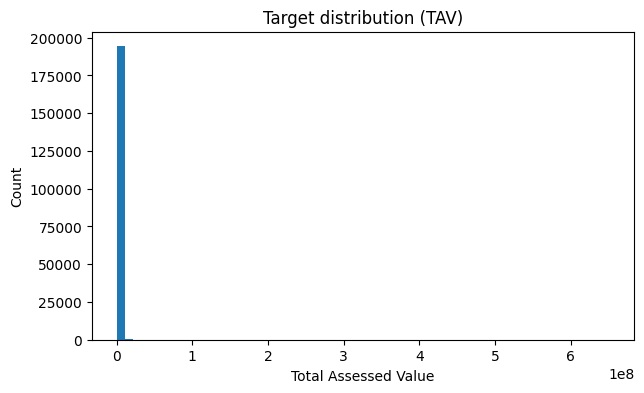

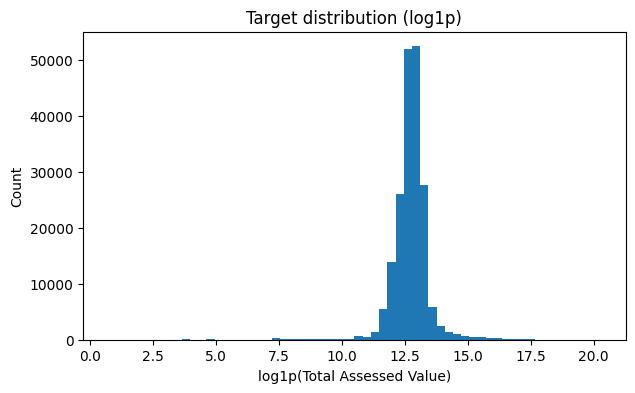

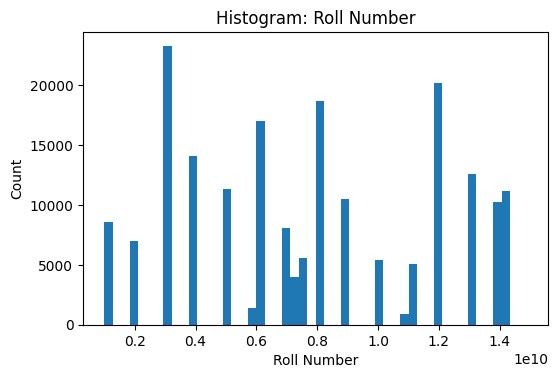

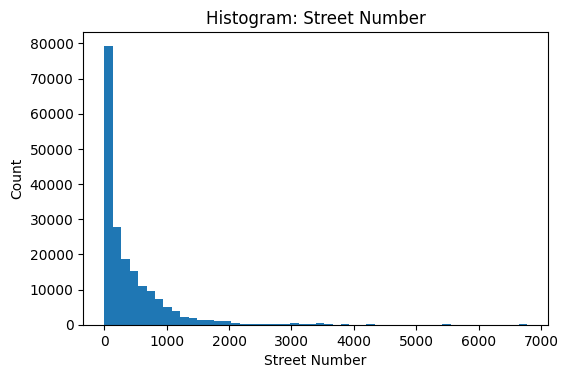

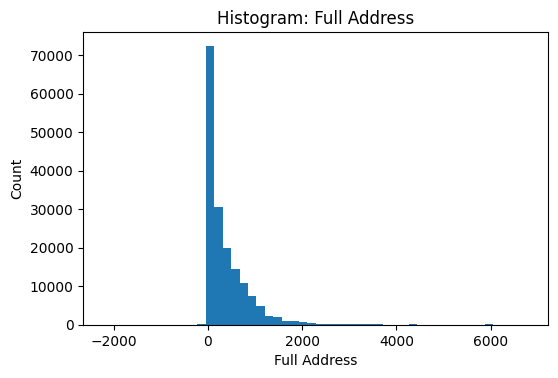

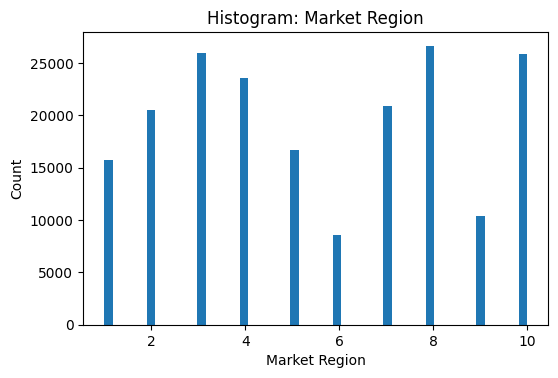

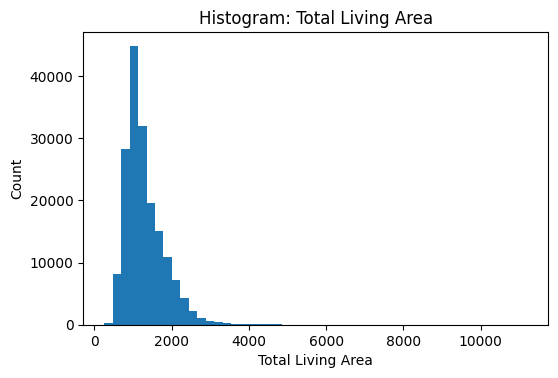

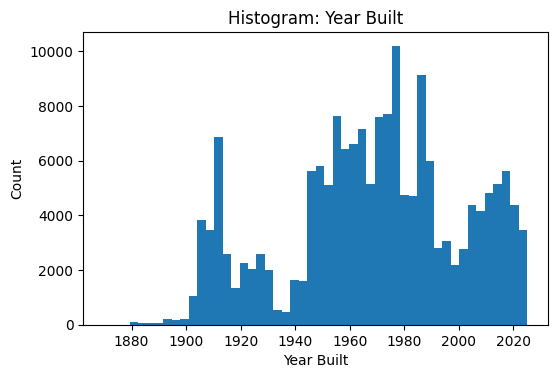

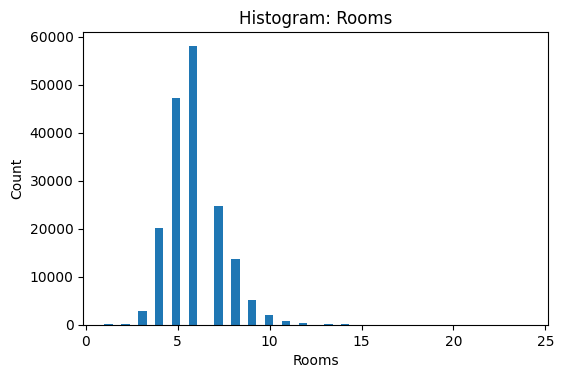

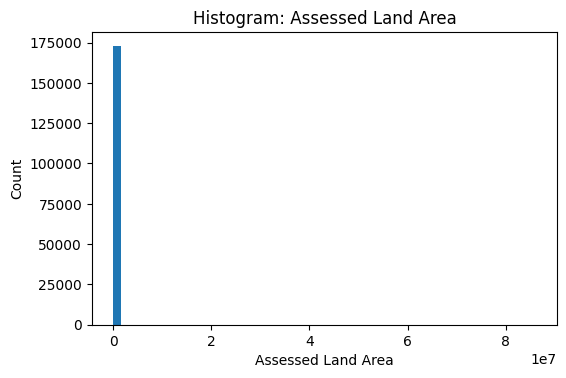

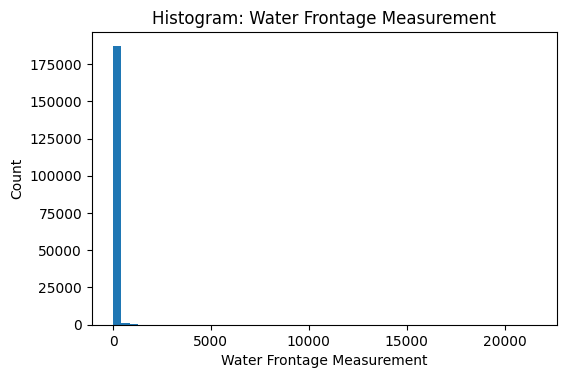

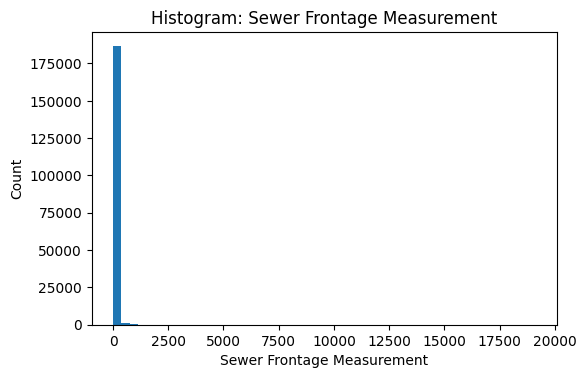

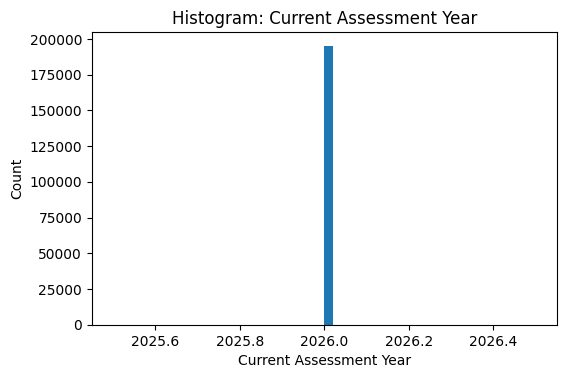

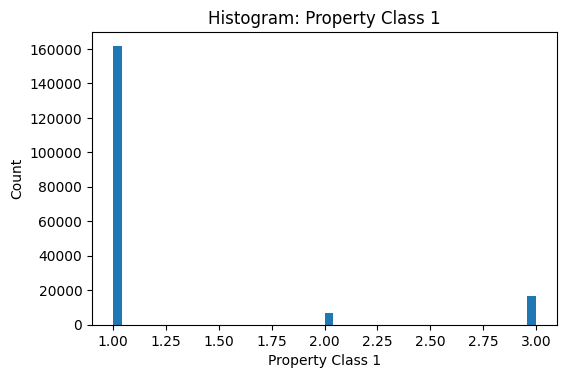

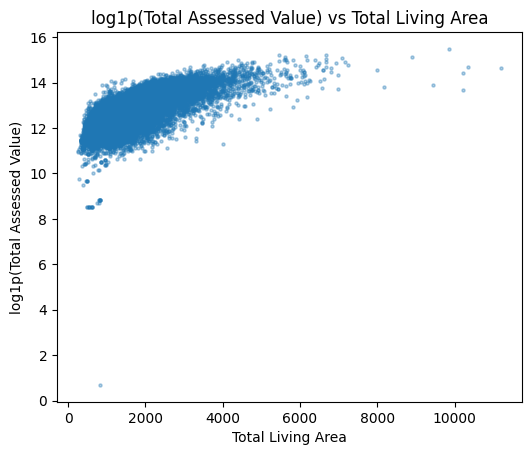

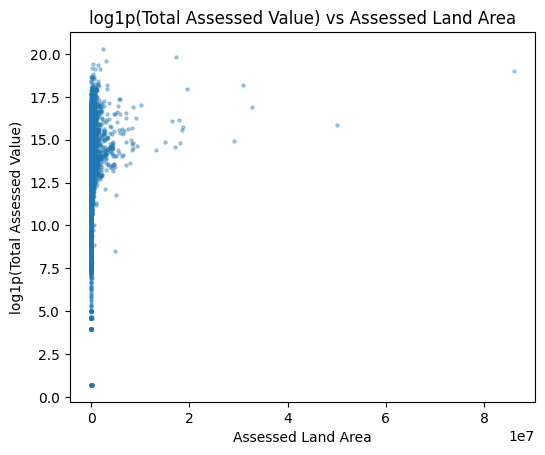

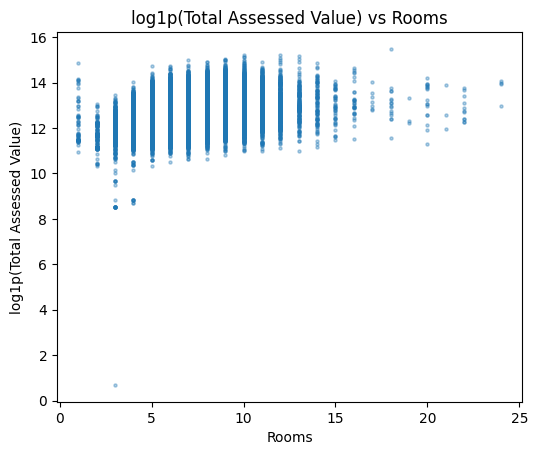

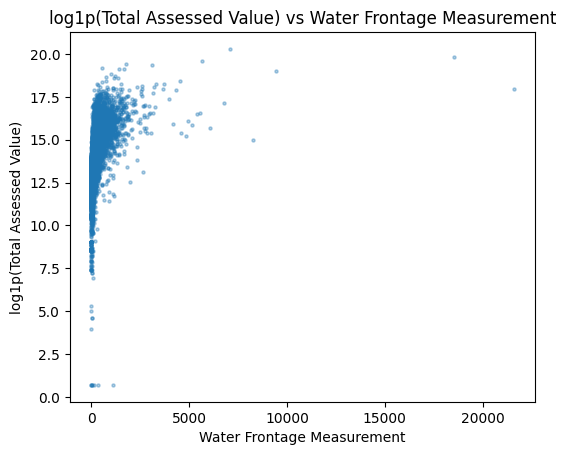

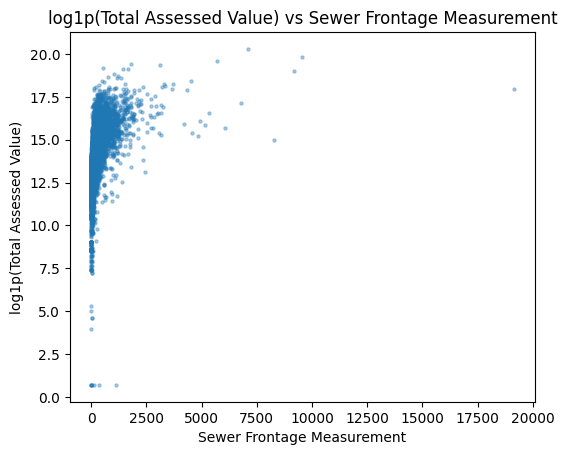


Spearman correlation (head):


,Total Assessed Value,Roll Number,Street Number,Full Address,Market Region,Total Living Area,Year Built,Rooms,Assessed Land Area,Water Frontage Measurement,Sewer Frontage Measurement,Current Assessment Year,Property Class 1
Total Assessed Value,1.000000,-0.263204,-0.289228,-0.285267,0.233896,0.746607,0.542674,0.555604,0.596821,0.566938,0.566655,NaN,-0.234541
Roll Number,-0.263204,1.000000,0.235106,0.254906,-0.143098,-0.165930,-0.353188,-0.081064,-0.312016,-0.244063,-0.244090,NaN,0.035249
Street Number,-0.289228,0.235106,1.000000,0.997350,-0.150346,-0.261774,-0.316674,-0.228599,-0.195525,-0.215642,-0.216040,NaN,0.146702
Full Address,-0.285267,0.254906,0.997350,1.000000,-0.173034,-0.267217,-0.409710,-0.196151,-0.196236,-0.178516,-0.179853,NaN,0.012336
Market Region,0.233896,-0.143098,-0.150346,-0.173034,1.000000,0.202403,0.161876,0.120950,0.183277,0.051134,0.050782,NaN,0.102734


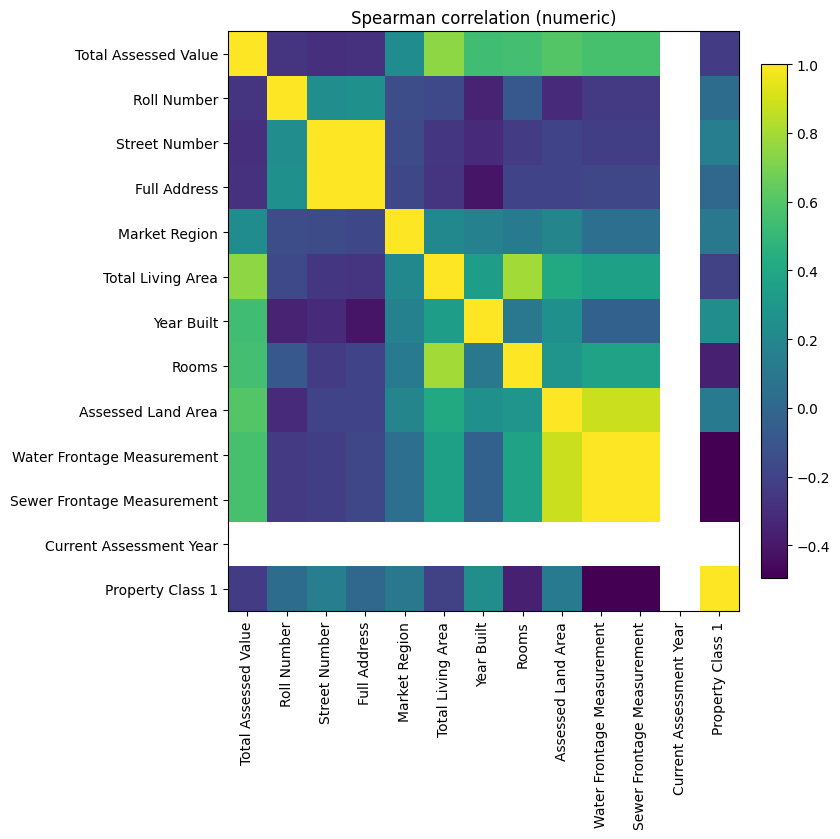


Target by Neighbourhood Area (top 15):


,count,median,mean
Neighbourhood Area,,,
RIVER PARK SOUTH,3859,403000.0,447844.020472
DAKOTA CROSSING,3441,451000.0,491398.635571
TYNDALL PARK,2898,337000.0,353297.946515
ROSSMERE-A,2845,329000.0,485858.064675
LINDEN WOODS,2809,589000.0,648971.055180
THE MAPLES,2771,350000.0,409588.370624
WINDSOR PARK,2749,356000.0,389911.632230
FORT RICHMOND,2730,400500.0,466344.272894
RIVER EAST,2508,385500.0,429097.907097


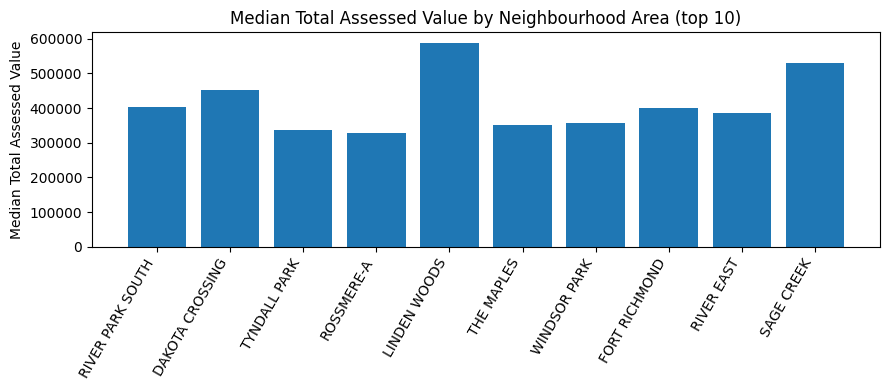


Target by Market Region (top 15):


,count,median,mean
Market Region,,,
"8, FORT GARRY / LINDENWOODS",26619,455000.0,677382.171719
"3, WEST KILDONAN / OLD KILDONAN",25997,346000.0,474500.689310
"10, NEW ST BONIFACE/NEW ST VITAL",25857,427000.0,538194.547357
"4, INNER CITY",23610,206000.0,543863.741508
"7, TUXEDO / RIVER HEIGHTS / FT ROUGE",20911,367000.0,537630.215102
"2, EAST KILDONAN / NORTH KILDONAN",20469,315000.0,409872.021496
"5, ST. JAMES",16668,327000.0,605630.774598
"1, TRANSCONA",15775,349000.0,536243.071189
"9, OLD ST BONIFACE/OLD ST VITAL",10405,312000.0,476796.171552


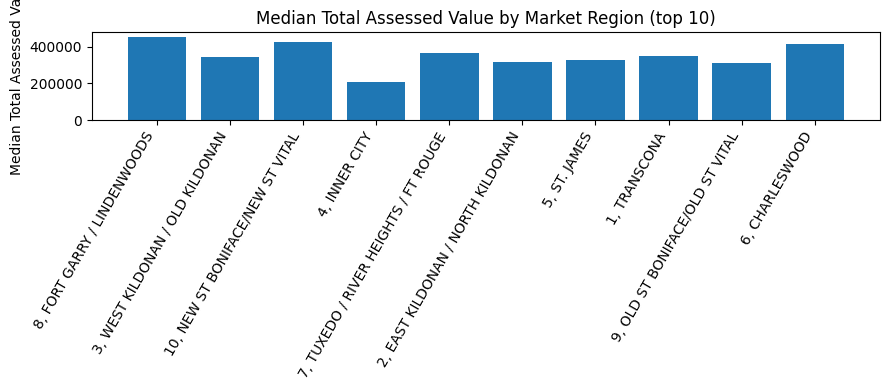


Target by Building Type (top 15):


,count,median,mean
Building Type,,,
ONE STOREY,73612,346000.0,361947.481389
TWO STOREY,38637,482000.0,485617.180423
ONE & 1/2 STOREY,14143,262000.0,274649.155059
BI-LEVEL,9239,347000.0,353368.979327
ONE & 3/4 STOREY,4404,217000.0,234755.903724
4 LEVEL SPLIT,4158,417000.0,430120.971621
TWO & 1/2 STOREY,3344,344000.0,384944.976077
CABOVER,3194,533000.0,539788.353162
TWO/ONE STOREY,2046,513000.0,538129.032258


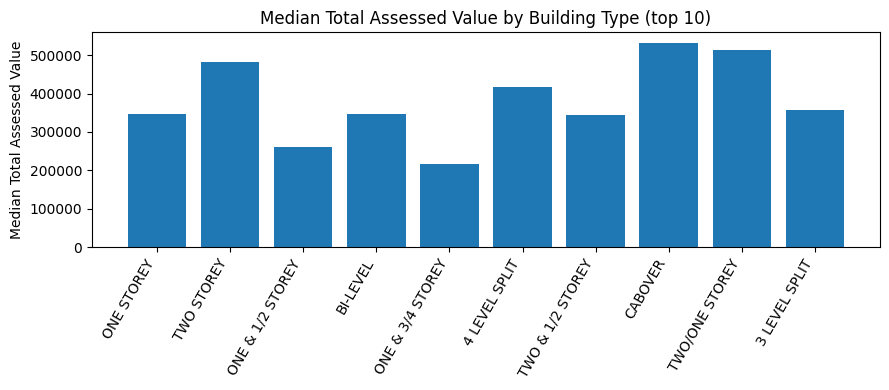


Target by Basement (top 15):


,count,median,mean
Basement,,,
Yes,155110,362000.0,391376.552124
No,20837,213000.0,236156.447713


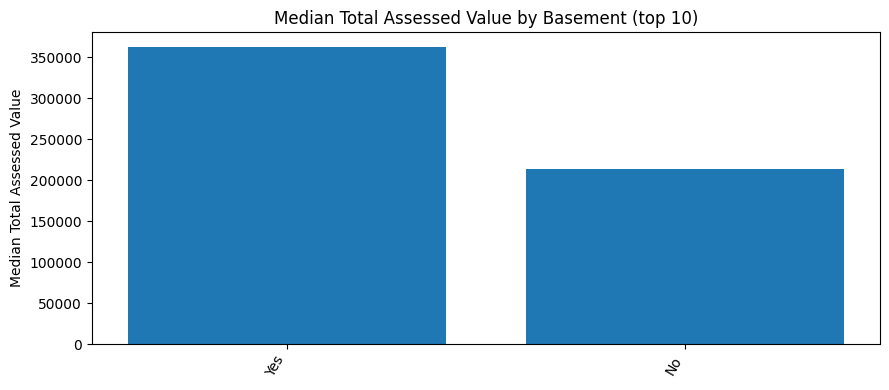


Target by Basement Finish (top 15):


,count,median,mean
Basement Finish,,,
Yes,112635,370000.0,408278.634527
No,64516,270000.0,313170.669307


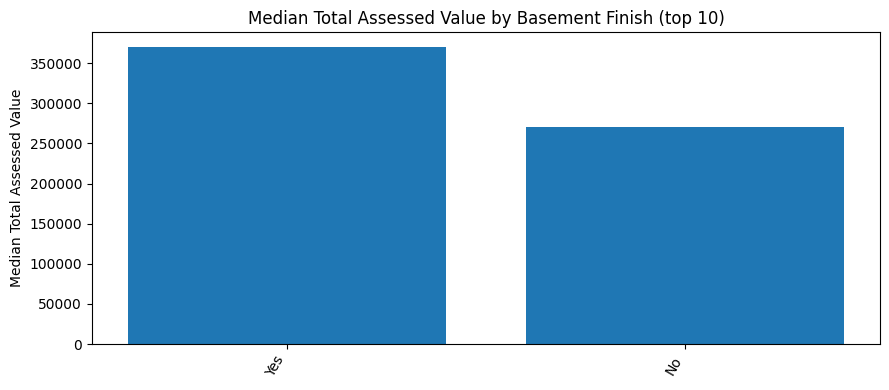


Target by Property Use Code (top 15):


,count,median,mean
Property Use Code,,,
RESSD - DETACHED SINGLE DWELLING,141602,367000.0,3.973799e+05
CNAPT - CONDO APARTMENT,16507,206000.0,2.296272e+05
RESSS - SIDE BY SIDE,7789,273000.0,2.962233e+05
VRES1 - VACANT RESIDENTIAL 1,5397,120000.0,1.188758e+05
CNRES - CONDO RESIDENTIAL,4914,339000.0,3.444866e+05
RESMC - MULTIFAMILY CONVERSION,2491,243000.0,2.718952e+05
RESRH - ROW HOUSING,1525,257000.0,2.794538e+05
RESAP - APARTMENTS,1496,2130000.0,5.885499e+06
INWWH - WAREHOUSE,1316,1454500.0,2.931086e+06


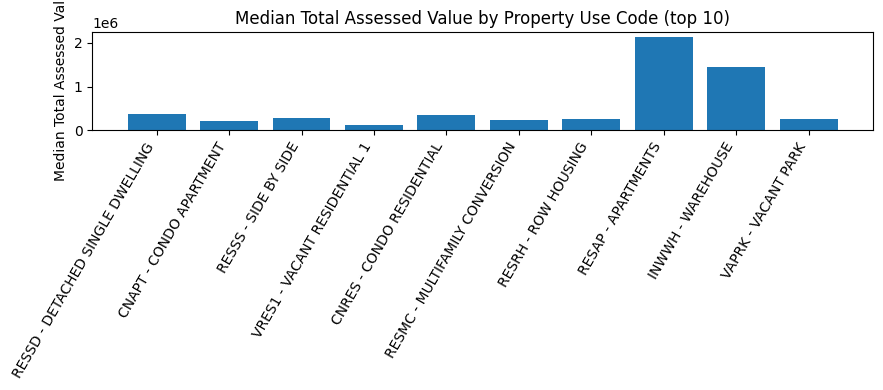

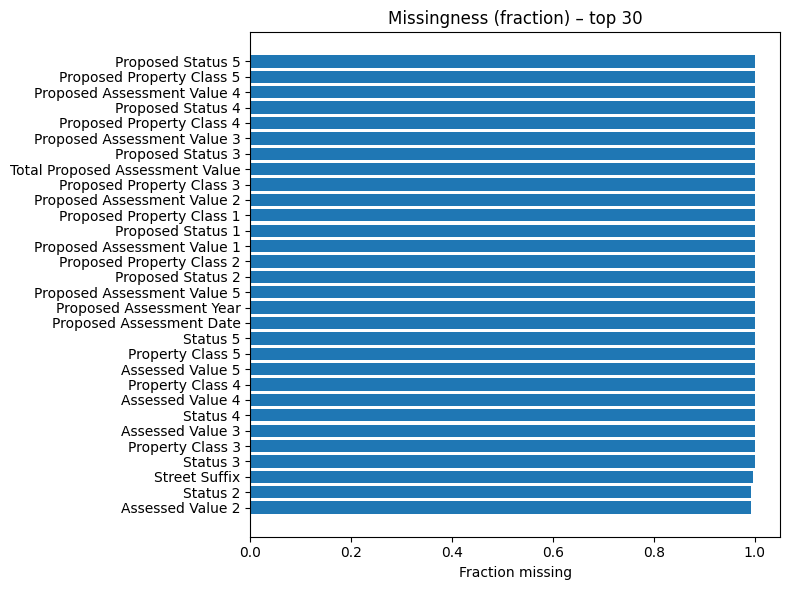

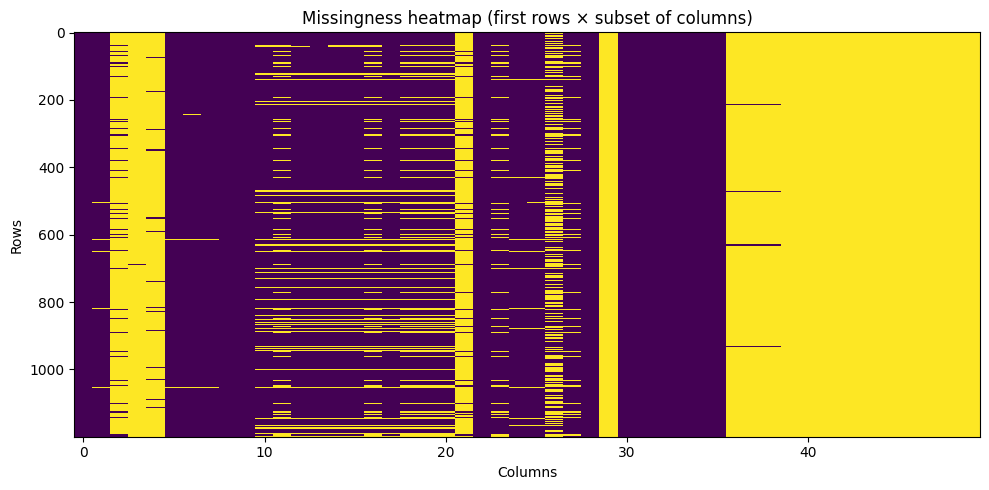


Outlier diagnostics (key numerics):


,feature,q1,q3,iqr,lo,hi,pct_below_lo,pct_above_hi
1,Assessed Land Area,3995.00,6580.0,2585.00,117.500,10457.500,0.001381,0.095588
3,Water Frontage Measurement,31.09,54.0,22.91,-3.275,88.365,0.000000,0.037956
4,Sewer Frontage Measurement,31.00,54.0,23.00,-3.500,88.500,0.000000,0.037218
0,Total Living Area,960.00,1558.0,598.00,63.000,2455.000,0.000000,0.029684
2,Rooms,5.00,7.0,2.00,2.000,10.000,0.000347,0.009136


In [23]:
# EXPLORATORY DATA ANALYSIS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TARGET = "Total Assessed Value"

# If you're starting from df instead of train_df, uncomment:
# train_df = df.copy()

# replace and convert data with [^0-9.\-] else 0
def numify(s: pd.Series) -> pd.Series:
    """Coerce strings like '$450,000' to numeric; returns 0 if not parseable."""
    return pd.to_numeric(s.astype(str).str.replace(r"[^0-9.\-]", "", regex=True), errors="coerce")

def show_table(name, df, rows=10):
    print(f"\n{name}:")
    display(df.head(rows))  

#  Quick structure
print("Rows, Cols:", train_df.shape)
show_table("Dtypes", train_df.dtypes.rename("dtype").to_frame())
show_table("Describe (numeric)", train_df.describe().T)
missing = train_df.isna().mean().sort_values(ascending=False)
show_table("Top missingness", missing.to_frame("missing_frac"))

# Target numeric
if TARGET not in train_df.columns:
    raise ValueError(f"Target '{TARGET}' not found in train_df.")
y = numify(train_df[TARGET])
y_pos = y[y > 0]

# Target distribution
plt.figure(figsize=(7,4))
plt.hist(y_pos, bins=60)
plt.title("Target distribution (TAV)")
plt.xlabel(TARGET); plt.ylabel("Count")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(np.log1p(y_pos), bins=60)
plt.title("Target distribution (log1p)")
plt.xlabel(f"log1p({TARGET})"); plt.ylabel("Count")
plt.show()

# Numeric feature histograms 
num_cols = []
for c in train_df.columns:
    if c == TARGET: 
        continue
    if pd.api.types.is_numeric_dtype(train_df[c]):
        num_cols.append(c)
    elif pd.api.types.is_object_dtype(train_df[c]):
        s = numify(train_df[c])
        if s.notna().mean() > 0.5:
            num_cols.append(c)

num_cols = num_cols[:12]  # keep it readable
for c in num_cols:
    s = train_df[c]
    if s.dtype == "O": s = numify(s)
    plt.figure(figsize=(6,3.8))
    plt.hist(s.dropna(), bins=50)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c); plt.ylabel("Count")
    plt.show()

#  Target vs key predictors (scatter on log target)
key_nums = [c for c in ["Total Living Area","Assessed Land Area","Rooms","Age",
                        "Area_per_Room","Lot_to_Living_Ratio",
                        "Water Frontage Measurement","Sewer Frontage Measurement"]
            if c in train_df.columns][:6]

for c in key_nums:
    x = train_df[c]
    if x.dtype == "O": x = numify(x)
    mask = x.notna() & y.notna() & (y > 0)
    if mask.sum() < 200: 
        continue
    plt.figure(figsize=(6,4.8))
    plt.scatter(x[mask], np.log1p(y[mask]), s=5, alpha=0.35)
    plt.title(f"log1p({TARGET}) vs {c}")
    plt.xlabel(c); plt.ylabel(f"log1p({TARGET})")
    plt.show()

#  Spearman correlation (numeric)
numeric_for_corr = {}
keep_cols = [TARGET] + [c for c in num_cols if c != TARGET]
for c in keep_cols:
    s = train_df[c]
    if s.dtype == "O": s = numify(s)
    numeric_for_corr[c] = s
corr = pd.DataFrame(numeric_for_corr).corr(method="spearman", min_periods=100)
show_table("Spearman correlation (head)", corr.head())

plt.figure(figsize=(min(12, 0.5*len(corr.columns)+2), min(10, 0.5*len(corr.columns)+2)))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Spearman correlation (numeric)")
plt.tight_layout()
plt.show()

#  Categorical summaries 
cat_candidates = ["Neighbourhood Area","Market Region","Building Type","Basement","Basement Finish","Property Use Code"]
cats = [c for c in cat_candidates if c in train_df.columns]

def cat_target_summary(df, cat):
    t = numify(df[TARGET])
    g = (df.assign(_T=t).groupby(cat)["_T"]
           .agg(count="count", median="median", mean="mean")
           .sort_values("count", ascending=False))
    return g

for c in cats:
    g = cat_target_summary(train_df, c).head(15)
    show_table(f"Target by {c} (top 15)", g)

# plot bar of medians (top 10 by count)
    top = g.head(10)
    plt.figure(figsize=(9,4))
    plt.bar(top.index.astype(str), top["median"])
    plt.title(f"Median {TARGET} by {c} (top 10)")
    plt.xticks(rotation=60, ha="right")
    plt.ylabel(f"Median {TARGET}")
    plt.tight_layout()
    plt.show()

# plot Missingness bars & quick heatmap on subset
top_miss = missing.head(30)
plt.figure(figsize=(8,6))
plt.barh(top_miss.index[::-1], top_miss.values[::-1])
plt.title("Missingness (fraction) – top 30")
plt.xlabel("Fraction missing")
plt.tight_layout()
plt.show()

N = min(1200, len(train_df))
subset_cols = list(train_df.columns[:50])
M = train_df[subset_cols].isna().iloc[:N, :]
plt.figure(figsize=(10,5))
plt.imshow(M, aspect="auto", interpolation="nearest")
plt.title("Missingness heatmap (first rows × subset of columns)")
plt.xlabel("Columns"); plt.ylabel("Rows")
plt.tight_layout()
plt.show()

#  Outlier on key numerics
diags = []
for c in key_nums:
    if c not in train_df.columns: 
        continue
    s = train_df[c]
    if s.dtype == "O": s = numify(s)
    s = s.dropna()
    if s.empty: 
        continue
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    diags.append({
        "feature": c, "q1": q1, "q3": q3, "iqr": iqr,
        "lo": lo, "hi": hi,
        "pct_below_lo": float((s < lo).mean()),
        "pct_above_hi": float((s > hi).mean())
    })
diags_df = pd.DataFrame(diags).sort_values("pct_above_hi", ascending=False)
show_table("Outlier diagnostics (key numerics)", diags_df)


In [24]:
#  setup libraries
import numpy as np, pandas as pd
from IPython.display import display
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

TARGET = "Total Assessed Value"

def numify(s: pd.Series) -> pd.Series:
    """Parse '$1,234' → 1234.0; fill NaN with 0 to keep downstream non-negative."""
    return pd.to_numeric(s.astype(str).str.replace(r"[^0-9.\-]", "", regex=True),
                         errors="coerce").fillna(0)

def make_ohe():
    """Sklearn-version-safe OneHotEncoder (dense)."""
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

class SafeSelectKBest(SelectKBest):
    """Clip k so it never exceeds n_features after transforms."""
    def fit(self, X, y):
        import numpy as np
        X = np.asarray(X)
        if self.k == "all" or self.k is None or self.k > X.shape[1]:
            self.k = X.shape[1]
        return super().fit(X, y)


In [25]:
# numeric cleaning for key columns 
cols_to_clean = [
    "Total Living Area","Assessed Land Area","Rooms",TARGET,
    "Water Frontage Measurement","Sewer Frontage Measurement","Year Built"
]
for c in cols_to_clean:
    if c in df.columns:
        df[c] = numify(df[c])

print("After cleaning (sample dtypes/values):")
display(df[ [c for c in cols_to_clean if c in df.columns] ].head(8))



After cleaning (sample dtypes/values):


,Total Living Area,Assessed Land Area,Rooms,Total Assessed Value,Water Frontage Measurement,Sewer Frontage Measurement,Year Built
0,1313.0,197030.0,5.0,723000.0,0.0,0.0,1991.0
1,4007.0,218155.0,8.0,1619000.0,0.0,0.0,1991.0
2,1052.0,43628.0,5.0,570000.0,0.0,0.0,2007.0
3,3120.0,130705.0,6.0,743000.0,0.0,0.0,1982.0
4,1510.0,130718.0,5.0,577000.0,0.0,0.0,1970.0
5,4570.0,131116.0,8.0,979000.0,0.0,0.0,1958.0
6,4932.0,105687.0,10.0,1900000.0,0.0,0.0,2021.0
7,2773.0,105675.0,9.0,995000.0,0.0,0.0,2000.0


In [27]:
# FEATURE  ENGINEERING 


fe_df = df.copy()

# Age (non-negative)
if "Year Built" in fe_df.columns:
    fe_df["Age"] = (2025 - pd.to_numeric(fe_df["Year Built"], errors="coerce")).clip(lower=0)

# Ratios (stay >=0 if inputs are >=0)
if {"Total Living Area","Rooms"}.issubset(fe_df.columns):
    fe_df["Area_per_Room"] = fe_df["Total Living Area"] / fe_df["Rooms"].replace(0, np.nan)
if {"Assessed Land Area","Total Living Area"}.issubset(fe_df.columns):
    fe_df["Lot_to_Living_Ratio"] = fe_df["Assessed Land Area"] / fe_df["Total Living Area"].replace(0, np.nan)

# Amenities → 0/1
for b in ["Attached Garage","Detached Garage","Pool","Air Conditioning","Fire Place",
          "Water Frontage Present","Sewer Frontage Present"]:
    if b in fe_df.columns:
        fe_df[b] = fe_df[b].astype(str).str.strip().str.lower().isin(
            ["1","true","yes","y","t"]
        ).astype(float)

# show engineered columns inline
show_cols = [c for c in ["Age","Area_per_Room","Lot_to_Living_Ratio",
                         "Attached Garage","Detached Garage","Pool",
                         "Air Conditioning","Fire Place",
                         "Water Frontage Present","Sewer Frontage Present"] if c in fe_df.columns]
print("Featured Engineering columns preview:")
display(fe_df[show_cols].head(10))


Featured Engineering columns preview:


,Age,Area_per_Room,Lot_to_Living_Ratio,Attached Garage,Detached Garage,Pool,Air Conditioning,Fire Place
0,34.0,262.600000,150.060929,0.0,1.0,0.0,1.0,0.0
1,34.0,500.875000,54.443474,1.0,0.0,0.0,1.0,1.0
2,18.0,210.400000,41.471483,0.0,1.0,0.0,1.0,0.0
3,43.0,520.000000,41.892628,1.0,0.0,0.0,1.0,0.0
4,55.0,302.000000,86.568212,0.0,0.0,0.0,1.0,1.0
5,67.0,571.250000,28.690591,0.0,1.0,0.0,1.0,1.0
6,4.0,493.200000,21.428832,1.0,0.0,1.0,1.0,1.0
7,25.0,308.111111,38.108547,1.0,0.0,1.0,1.0,1.0
8,31.0,232.666667,75.689828,1.0,0.0,0.0,1.0,1.0
9,17.0,277.750000,47.547705,1.0,0.0,0.0,1.0,0.0


In [28]:
# DATA PREPROCESSING

# define feature groups (keep only existing)
num_candidates = [
    "Total Living Area","Assessed Land Area","Rooms","Age",
    "Area_per_Room","Lot_to_Living_Ratio",
    "Water Frontage Measurement","Sewer Frontage Measurement",
    "Attached Garage","Detached Garage","Pool","Air Conditioning","Fire Place",
    "Water Frontage Present","Sewer Frontage Present"
]
cat_candidates = [
    "Neighbourhood Area","Market Region","Building Type","Basement","Basement Finish","Property Use Code"
]
num_features = [c for c in num_candidates if c in fe_df.columns]
cat_features = [c for c in cat_candidates if c in fe_df.columns]

# target for SelectKBest; keeps pipeline happy (no negatives required)
if TARGET not in fe_df.columns:
    raise ValueError(f"Missing target column: {TARGET}")
y = numify(fe_df[TARGET])

# column-wise transformers (MinMax keeps 0..1)
numeric_pipe = Pipeline([
    ("imp",  SimpleImputer(strategy="median")),
    ("scale", MinMaxScaler(feature_range=(0, 1))),            # <= non-negative scaling
    ("poly", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))  # products of [0,1] → [0,1]
])
categorical_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", make_ohe())                                       # dense OHE
])

ct = ColumnTransformer([
    ("num", numeric_pipe, num_features),
    ("cat", categorical_pipe, cat_features)
], remainder="drop")

# full preprocessing 
preprocessing = Pipeline([
    ("prep", ct),
    ("select", SafeSelectKBest(score_func=f_regression, k=300))  # auto-clips to n_features
])

X = fe_df.drop(columns=[TARGET])
X_ready = preprocessing.fit_transform(X, y)

print(" Preprocessing complete.")
print("Transformed matrix shape:", X_ready.shape)

# recover transformed feature names for display
feat_names = []
# numeric names after poly
if "num" in ct.named_transformers_:
    num_cols = [t[2] for t in ct.transformers_ if t[0] == "num"][0]
    poly = ct.named_transformers_["num"].named_steps.get("poly")
    if poly is not None:
        try:
            feat_names += poly.get_feature_names_out(num_cols).tolist()
        except Exception:
            feat_names += [f"num_{i}" for i in range(poly.n_output_features_)]
    else:
        feat_names += list(num_cols)
# categorical names after OHE
if "cat" in ct.named_transformers_:
    cat_cols = [t[2] for t in ct.transformers_ if t[0] == "cat"][0]
    ohe = ct.named_transformers_["cat"].named_steps.get("ohe")
    if ohe is not None:
        try:
            feat_names += ohe.get_feature_names_out(cat_cols).tolist()
        except Exception:
            feat_names += [f"cat_{i}"]

# adjust names if SelectKBest reduced features
feat_names = feat_names[:X_ready.shape[1]]

# inline preview (first 10 rows × 12 cols)
preview_cols = min(12, X_ready.shape[1])
df_preview = pd.DataFrame(X_ready[:, :preview_cols], columns=feat_names[:preview_cols])
display(df_preview.head(10))




 Preprocessing complete.
Transformed matrix shape: (243661, 300)


,Total Living Area,Assessed Land Area,Rooms,Age,Area_per_Room,Lot_to_Living_Ratio,Water Frontage Measurement,Sewer Frontage Measurement,Attached Garage,Detached Garage,Pool,Air Conditioning
0,0.117264,0.002289,0.172414,0.016790,0.030702,0.135988,0.0,0.0,1.0,0.0,1.0,0.0
1,0.357864,0.002534,0.275862,0.016790,0.065275,0.049338,0.0,0.0,0.0,0.0,1.0,1.0
2,0.093954,0.000507,0.172414,0.008889,0.023128,0.037582,0.0,0.0,1.0,0.0,1.0,0.0
3,0.278646,0.001518,0.206897,0.021235,0.068050,0.037964,0.0,0.0,0.0,0.0,1.0,0.0
4,0.134858,0.001518,0.172414,0.027160,0.036419,0.078450,0.0,0.0,0.0,0.0,1.0,1.0
5,0.408145,0.001523,0.275862,0.033086,0.075486,0.026000,0.0,0.0,1.0,0.0,1.0,1.0
6,0.440475,0.001228,0.344828,0.001975,0.064161,0.019419,0.0,0.0,0.0,1.0,1.0,1.0
7,0.247656,0.001227,0.310345,0.012346,0.037306,0.034535,0.0,0.0,0.0,1.0,1.0,1.0
8,0.124676,0.001227,0.206897,0.015309,0.026359,0.068592,0.0,0.0,0.0,0.0,1.0,1.0
9,0.198446,0.001227,0.275862,0.008395,0.032900,0.043089,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
#DATA VALIDATION

# CELL 1 — setup & helpers
import numpy as np, pandas as pd
from IPython.display import display

TARGET = "Total Assessed Value"

# columns you expect to exist
REQUIRED_COLS = [
    "Total Living Area","Assessed Land Area","Rooms","Year Built","Neighbourhood Area", TARGET
]

# numeric columns that must be >= 0 
NON_NEGATIVE_NUMS = [
    "Total Living Area","Assessed Land Area","Rooms",
    "Water Frontage Measurement","Sewer Frontage Measurement", TARGET
]

# soft upper bounds
UPPER_BOUNDS = {"Rooms": 40, "Total Living Area": 20000, "Assessed Land Area": 200000, TARGET: 2.5e7}

# max unique categories allowed
MAX_CARDINALITY = {"Neighbourhood Area": 2000, "Market Region": 200, "Building Type": 100, "Property Use Code": 500}

# thresholds
MAX_MISS_PER_COL = 0.40
MAX_MISS_PER_ROW = 0.60
IQR_K = 3.0  # higher = fewer flagged outliers

def numify(s: pd.Series) -> pd.Series:
    return pd.to_numeric(s.astype(str).str.replace(r"[^0-9.\-]", "", regex=True), errors="coerce")

def psi(a: np.ndarray, b: np.ndarray, bins=10) -> float:
    a, b = a[~np.isnan(a)], b[~np.isnan(b)]
    if len(a) == 0 or len(b) == 0: return np.nan
    qs = np.quantile(a, np.linspace(0,1,bins+1)); qs[0], qs[-1] = -np.inf, np.inf
    pa = np.histogram(a, bins=qs)[0] / max(len(a),1); pb = np.histogram(b, bins=qs)[0] / max(len(b),1)
    pa, pb = np.clip(pa, 1e-12, 1.0), np.clip(pb, 1e-12, 1.0)
    return float(np.sum((pa - pb) * np.log(pa / pb)))
print("ready.")


ready.


In [30]:
# CELL 2 — load & peek
path = r"C:\AVM Project\DATA\Assessment_Parcels_20251003 (1).csv"
df = pd.read_csv(path, low_memory=False)
df = df.loc[:, ~df.columns.str.contains(r"^Unnamed")]
print("Loaded:", df.shape)
display(df.head(5))


Loaded: (244574, 71)


,Roll Number,Street Number,Unit Number,Street Suffix,Street Direction,Street Name,Street Type,Full Address,Neighbourhood Area,Market Region,...,Proposed Assessment Value 4,Proposed Property Class 5,Proposed Status 5,Proposed Assessment Value 5,Multiple Residences,Geometry,Dwelling Units,Centroid Lat,Centroid Lon,GISID
0,1000001000,"1,636",NaN,NaN,NaN,MCCREARY,ROAD,1636 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.23311670618891 49.83063124...,1,49.83013745,-97.23469575,"148,170"
1,1000005500,"1,584",NaN,NaN,NaN,MCCREARY,ROAD,1584 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.2361802081971 49.831882231...,1,49.83164866,-97.23456483,"148,168"
2,1000008000,"1,574",NaN,NaN,NaN,MCCREARY,ROAD,1574 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.23616667174454 49.83203713...,1,49.83211335,-97.23452447,"185,348"
3,1000008200,"1,550",NaN,NaN,NaN,MCCREARY,ROAD,1550 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.23612611966252 49.83250120...,1,49.83242285,-97.23449748,"185,347"
4,1000008400,"1,538",NaN,NaN,NaN,MCCREARY,ROAD,1538 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.23608555720466 49.83296537...,1,49.83288701,-97.23445712,"185,346"


In [31]:
# required cols & dtypes
missing_required = [c for c in REQUIRED_COLS if c not in df.columns]
print("Missing required columns:", missing_required if missing_required else "None ")

# show dtypes (with light numeric parsing where appropriate)
parsed = {c: numify(df[c]) for c in df.columns if c in NON_NEGATIVE_NUMS or c == TARGET}
df_num = df.assign(**parsed)

print("\nDtypes (after numeric parsing where applicable):")
display(df_num.dtypes.rename("dtype").to_frame().head(25))


Missing required columns: None 

Dtypes (after numeric parsing where applicable):


,dtype
Roll Number,object
Street Number,object
Unit Number,object
Street Suffix,object
Street Direction,object
Street Name,object
Street Type,object
Full Address,object
Neighbourhood Area,object
Market Region,object


In [18]:
#  missingness
miss_col = df_num.isna().mean().sort_values(ascending=False)
print("Top 15 columns by missingness:")
display(miss_col.head(15).to_frame("missing_frac"))

high_miss_cols = miss_col[miss_col > MAX_MISS_PER_COL]
print("\nColumns over threshold:", "None ✅" if high_miss_cols.empty else "")
if not high_miss_cols.empty: display(high_miss_cols.to_frame("missing_frac"))

miss_row = df_num.isna().mean(axis=1)
bad_rows = miss_row[miss_row > MAX_MISS_PER_ROW]
print(f"\nRows with > {MAX_MISS_PER_ROW:.0%} missing: {bad_rows.shape[0]} ({bad_rows.shape[0]/len(df):.1%})")
display(df_num.loc[bad_rows.index].head(5))


Top 15 columns by missingness:


,missing_frac
Proposed Assessment Value 4,0.999992
Proposed Status 4,0.999992
Proposed Property Class 4,0.999992
Proposed Assessment Value 3,0.999992
Proposed Status 3,0.999992
Proposed Property Class 3,0.999992
Total Proposed Assessment Value,0.999992
Proposed Assessment Value 2,0.999992
Proposed Status 1,0.999992
Proposed Property Class 1,0.999992



Columns over threshold: 


,missing_frac
Proposed Assessment Value 4,0.999992
Proposed Status 4,0.999992
Proposed Property Class 4,0.999992
Proposed Assessment Value 3,0.999992
Proposed Status 3,0.999992
Proposed Property Class 3,0.999992
Total Proposed Assessment Value,0.999992
Proposed Assessment Value 2,0.999992
Proposed Status 1,0.999992
Proposed Property Class 1,0.999992



Rows with > 60% missing: 23548 (9.6%)


,Roll Number,Street Number,Unit Number,Street Suffix,Street Direction,Street Name,Street Type,Full Address,Neighbourhood Area,Market Region,...,Proposed Assessment Value 4,Proposed Property Class 5,Proposed Status 5,Proposed Assessment Value 5,Multiple Residences,Geometry,Dwelling Units,Centroid Lat,Centroid Lon,GISID
16,1000033500,NaN,NaN,NaN,NaN,MCCREARY,ROAD,MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-97.23543566846176 49.84040093...,0,49.84016765,-97.23382394,"135,545"
19,1000048500,"1,268",NaN,NaN,NaN,MCCREARY,ROAD,1268 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-97.23201070804332 49.84225951...,2,49.84249368,-97.23362165,"184,802"
20,1000061000,"1,750",NaN,NaN,NaN,MCCREARY,ROAD,1750 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-97.2335423107464 49.826226152...,0,49.8260876,-97.23512038,"188,858"
28,1000066700,"1,976",NaN,NaN,NaN,MCCREARY,ROAD,1976 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-97.23414833831605 49.81921872...,0,49.81908212,-97.23572924,"187,876"
37,1000096000,"1,720",NaN,NaN,NaN,MCCREARY,ROAD,1720 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-97.2348707144717 49.827521220...,1,49.82690191,-97.23497746,"185,357"


In [32]:
# CELL 5 — target checks
assert TARGET in df_num.columns, f"Target '{TARGET}' not found."
y = numify(df_num[TARGET])

print("Target summary:")
display(y.describe(percentiles=[.1,.25,.5,.75,.9]).to_frame().T)

neg_t = int((y < 0).sum()); zero_t = int((y == 0).sum())
print(f"Negative target rows: {neg_t} | Zero target rows: {zero_t}")


Target summary:


,count,mean,std,min,10%,25%,50%,75%,90%,max
Total Assessed Value,243661.0,534076.096097,2.777152e+06,1.0,171000.0,255000.0,349000.0,466000.0,603000.0,651316000.0


Negative target rows: 0 | Zero target rows: 0


In [33]:
#  ranges & cardinality
issues = []

# non-negative and upper bounds
for c in NON_NEGATIVE_NUMS:
    if c in df_num.columns:
        nneg = int((df_num[c] < 0).sum())
        if nneg > 0: issues.append((c, f"{nneg} values < 0"))
for c, ub in UPPER_BOUNDS.items():
    if c in df_num.columns:
        nhi = int((df_num[c] > ub).sum())
        if nhi > 0: issues.append((c, f"{nhi} values > {ub}"))

print("Range issues:")
if issues:
    display(pd.DataFrame(issues, columns=["column","issue"]))
else:
    print("None ")

# cardinality
cards = []
for c, max_card in MAX_CARDINALITY.items():
    if c in df.columns:
        nuniq = df[c].nunique(dropna=True)
        if nuniq > max_card:
            cards.append((c, nuniq, max_card))
print("\nCategorical cardinality:")
if cards:
    display(pd.DataFrame(cards, columns=["column","n_unique","max_allowed"]))
else:
    print("All within limits ")


Range issues:


,column,issue
0,Assessed Land Area,2390 values > 200000
1,Total Assessed Value,271 values > 25000000.0



Categorical cardinality:
All within limits 


In [34]:
# CELL 7 — duplicates & IQR outliers
dup_all = df.duplicated().sum()
print("Duplicate full rows:", dup_all)

key_cols = [c for c in ["Total Assessed Value","Total Living Area","Assessed Land Area"] if c in df.columns]
if key_cols:
    dup_keys = df.duplicated(subset=key_cols).sum()
    print(f"Duplicates by key {key_cols}:", dup_keys)

iqr_rows = []
for c in [x for x in NON_NEGATIVE_NUMS if x in df_num.columns]:
    s = df_num[c].dropna()
    if len(s) < 100: continue
    q1, q3 = s.quantile([.25,.75]); iqr = q3 - q1
    lo, hi = q1 - IQR_K*iqr, q3 + IQR_K*iqr
    pct_lo, pct_hi = float((s < lo).mean()), float((s > hi).mean())
    if pct_lo > 0 or pct_hi > 0:
        iqr_rows.append({"feature": c, "low": lo, "high": hi, "pct_below": pct_lo, "pct_above": pct_hi})

print("\nOutlier scan (IQR):")
if iqr_rows:
    display(pd.DataFrame(iqr_rows).sort_values("pct_above", ascending=False).head(10))
else:
    print("No notable IQR outliers ✅")


Duplicate full rows: 0
Duplicates by key ['Total Assessed Value', 'Total Living Area', 'Assessed Land Area']: 19654

Outlier scan (IQR):


,feature,low,high,pct_below,pct_above
1,Assessed Land Area,-3751.0,14323.0,0.0,0.063046
5,Total Assessed Value,-378000.0,1099000.0,0.0,0.032718
3,Water Frontage Measurement,-38.0,123.0,0.0,0.025301
4,Sewer Frontage Measurement,-38.0,123.0,0.0,0.024622
0,Total Living Area,-828.0,3344.0,0.0,0.005373
2,Rooms,-1.0,13.0,0.0,0.001253


In [35]:
# check population stability check
if 'train_df' in globals() and 'test_df' in globals():
    print("📊 Train vs Test stability (PSI: ~0 good, >0.2 watch, >0.3 drift)")
    cols = [c for c in NON_NEGATIVE_NUMS if c in train_df.columns and c in test_df.columns]
    rows = []
    for c in cols:
        a = numify(train_df[c]).values
        b = numify(test_df[c]).values
        rows.append({"feature": c, "psi": psi(a, b)})
    display(pd.DataFrame(rows).sort_values("psi", ascending=False))
else:
    print("ℹ️ Define train_df and test_df to run PSI drift.")


📊 Train vs Test stability (PSI: ~0 good, >0.2 watch, >0.3 drift)


,feature,psi
0,Total Living Area,0.000317
2,Rooms,0.000282
1,Assessed Land Area,0.000231
4,Sewer Frontage Measurement,0.000121
3,Water Frontage Measurement,0.000108
5,Total Assessed Value,0.000004


In [37]:
RANDOM_STATE = 42  # ensures reproducible train/test splits


In [39]:
# --- create OneHotEncoder 
from sklearn.preprocessing import OneHotEncoder

def _make_ohe():
    """
    Creates a OneHotEncoder compatible with your scikit-learn version.
    (In sklearn >=1.4, the param is 'sparse_output'; older versions use 'sparse'.)
    """
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)  
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)         


In [41]:
# CELL 2 — split 80/20 by target deciles + preprocessing
assert TARGET in df.columns, f"'{TARGET}' not found."

y_all = _numify(df[TARGET])
mask = y_all > 0
data = df.loc[mask].copy()
y_all = y_all.loc[data.index]

# stratify by target deciles
bins = pd.qcut(y_all, q=10, labels=False, duplicates="drop")
train_df, test_df = train_test_split(
    data, test_size=0.20, random_state=RANDOM_STATE, stratify=bins
)

print(f" Split complete → Train: {train_df.shape} | Test: {test_df.shape}")

def _show_bins(a_df, name):
    ya = _numify(a_df[TARGET])
    try:
        b = pd.qcut(ya, q=10, labels=False, duplicates="drop")
        vc = b.value_counts(normalize=True).sort_index().round(3)
        print(f"{name} deciles:", dict(vc))
    except Exception:
        pass

_show_bins(train_df, "Train")
_show_bins(test_df,  "Test")

# Build matrices
X_train, y_train = train_df.drop(columns=[TARGET]), _numify(train_df[TARGET])
X_test,  y_test  = test_df.drop(columns=[TARGET]),  _numify(test_df[TARGET])

# Preprocessor (MinMax keeps features non-negative)
def make_preprocessor(X: pd.DataFrame) -> ColumnTransformer:
    num_candidates = [
        "Total Living Area","Assessed Land Area","Rooms","Age",
        "Area_per_Room","Lot_to_Living_Ratio",
        "Water Frontage Measurement","Sewer Frontage Measurement",
        "Attached Garage","Detached Garage","Pool","Air Conditioning","Fire Place",
        "Water Frontage Present","Sewer Frontage Present"
    ]
    cat_candidates = [
        "Neighbourhood Area","Market Region","Building Type","Basement","Basement Finish","Property Use Code"
    ]
    num_features = [c for c in num_candidates if c in X.columns]
    cat_features = [c for c in cat_candidates if c in X.columns]

    numeric_pipe = Pipeline([
        ("imp",  SimpleImputer(strategy="median")),
        ("sc",   MinMaxScaler((0,1))),
        ("poly", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))
    ])
    categorical_pipe = Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", _make_ohe())
    ])
    return ColumnTransformer([
        ("num", numeric_pipe, num_features),
        ("cat", categorical_pipe, cat_features)
    ], remainder="drop")

preprocessor = make_preprocessor(pd.concat([X_train, X_test], axis=0))
base_pipe = Pipeline([
    ("clean",  BasicNumericCleaner(target=TARGET)),
    ("fe",     AddFeatures()),
    ("prep",   preprocessor),
    ("select", SafeSelectKBest(score_func=f_regression, k=300))
])

# quick transform sanity on a small sample
Xs = base_pipe.fit_transform(X_train.head(200), y_train.head(200))
print(" Preprocessing OK. Sample transformed shape:", Xs.shape)


 Split complete → Train: (194928, 71) | Test: (48733, 71)
Train deciles: {0: np.float64(0.101), 1: np.float64(0.099), 2: np.float64(0.102), 3: np.float64(0.1), 4: np.float64(0.1), 5: np.float64(0.099), 6: np.float64(0.101), 7: np.float64(0.1), 8: np.float64(0.099), 9: np.float64(0.1)}
Test deciles: {0: np.float64(0.101), 1: np.float64(0.1), 2: np.float64(0.102), 3: np.float64(0.1), 4: np.float64(0.1), 5: np.float64(0.099), 6: np.float64(0.101), 7: np.float64(0.1), 8: np.float64(0.099), 9: np.float64(0.099)}
 Preprocessing OK. Sample transformed shape: (200, 208)


In [100]:
# SAFE STRAT BINS + CV FACTORY
from sklearn.model_selection import KFold, StratifiedKFold

def make_safe_strat_bins(y: pd.Series, max_bins=10, min_count=5):
    """Return robust stratification labels or None if not feasible."""
    y = pd.to_numeric(y, errors="coerce").dropna()
    for q in range(max_bins, 1, -1):
        try:
            bins = pd.qcut(y, q=q, labels=False, duplicates="drop")
            vc = bins.value_counts()
            if (vc >= min_count).all():
                print(f" Using stratified target bins: q={q} (all bins ≥ {min_count})")
                print("Bin sizes:", vc.sort_index().to_dict())
                # Reindex to original y index so we can pass labels aligned with X
                return bins.reindex(y.index)
            else:
                # print a quick hint and keep trying fewer bins
                bad = vc[vc < min_count].to_dict()
                print(f" q={q} has undersized bins: {bad} → trying fewer bins…")
        except ValueError:
            # Happens if many ties/unique values issues; just try fewer bins
            continue
    print(" Could not create safe stratification bins → will use plain KFold.")
    return None

# Build robust bins
N_SPLITS = 5  # keep your choice
y_bins_safe = make_safe_strat_bins(y_train, max_bins=10, min_count=N_SPLITS)

# Choose Cross Validation splitter
if y_bins_safe is not None:
    # Wrap a StratifiedKFold and pass y_bins_safe to GridSearchCV via 'cv' by using a custom splitter
    # Simple route: use StratifiedKFold and pass labels in 'fit' via 'groups'? No — stratified uses y directly.
    # Instead, we’ll pass (X, y_bins_safe) to splitter by building indices per split.
    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    # Precompute splits once to reuse in all GridSearchCV runs
    strat_splits = list(skf.split(X_train, y_bins_safe))
    cv = strat_splits
    print(f" Using StratifiedKFold with {N_SPLITS} folds.")
else:
    cv = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    print(f"Using plain KFold with {N_SPLITS} folds (no stratification).")


 Using stratified target bins: q=10 (all bins ≥ 5)
Bin sizes: {0: 19665, 1: 19394, 2: 19819, 3: 19458, 4: 19418, 5: 19342, 6: 19606, 7: 19443, 8: 19290, 9: 19493}
 Using StratifiedKFold with 5 folds.


In [44]:
# --- Required model imports ---
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor


In [45]:
#  3-fold CV 
import numpy as np, pandas as pd
from sklearn.model_selection import StratifiedKFold, KFold

# Use fewer folds
N_SPLITS = 3
RANDOM_STATE = 42

def make_safe_strat_bins(y: pd.Series, max_bins=10, min_count=None):
    y = pd.to_numeric(y, errors="coerce")
    y = y.loc[y.notna()]
    if min_count is None:
        min_count = N_SPLITS
    for q in range(max_bins, 1, -1):
        try:
            b = pd.qcut(y, q=q, labels=False, duplicates="drop")
        except ValueError:
            continue
        vc = b.value_counts()
        if (vc >= min_count).all():
            print(f" Using stratified target bins: q={q} (all bins ≥ {min_count})")
            print("Bin sizes:", vc.sort_index().to_dict())
            return b.reindex(y.index)
        else:
            print(f" q={q} has undersized bins; trying fewer bins…")
    print("Could not build safe bins → will use plain KFold.")
    return None

# Build bins and choose CV
y_bins_safe = make_safe_strat_bins(y_train, max_bins=10, min_count=N_SPLITS)

if y_bins_safe is not None:
    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    cv = list(skf.split(X_train, y_bins_safe))
    print(f" CV: StratifiedKFold({N_SPLITS})")
else:
    cv = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    print(f"CV: KFold({N_SPLITS})")

#  Target finiteness
if not np.isfinite(y_train).all():
    y_train = np.nan_to_num(y_train, nan=0.0, posinf=0.0, neginf=0.0)


 Using stratified target bins: q=10 (all bins ≥ 3)
Bin sizes: {0: 19665, 1: 19394, 2: 19819, 3: 19458, 4: 19418, 5: 19342, 6: 19606, 7: 19443, 8: 19290, 9: 19493}
 CV: StratifiedKFold(3)


In [50]:
#Patch: RMSE scorer 
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

def rmse(y_true, y_pred):
    # no squared=False here; take sqrt explicitly
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

scorers = {
    "MAE":  make_scorer(mean_absolute_error, greater_is_better=False),
    "RMSE": make_scorer(rmse, greater_is_better=False),
    "R2":   make_scorer(r2_score)
}
REFIT = "MAE"

print(" Patched scorers set (MAE, RMSE, R2).")


 Patched scorers set (MAE, RMSE, R2).


In [53]:
# Subsample 20% of the training data for CV to reduce RAM/CPU
FRAC = 0.20
RANDOM_STATE = 42

idx = X_train.sample(frac=FRAC, random_state=RANDOM_STATE).index
X_tr_small = X_train.loc[idx]
y_tr_small = y_train.loc[idx]

print(f"CV subsample: {X_tr_small.shape} (from {X_train.shape})")

# Safe 3-fold splitter (stratified by target deciles if feasible)
from sklearn.model_selection import StratifiedKFold, KFold
import pandas as pd

N_SPLITS = 3
cv = None
try:
    y_bins_small = pd.qcut(y_tr_small, q=10, labels=False, duplicates="drop")
    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    cv = list(skf.split(X_tr_small, y_bins_small))
    print("CV: StratifiedKFold(3) on subsample")
except Exception:
    cv = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    print("CV: KFold(3) on subsample")


CV subsample: (38986, 70) (from (194928, 70))
CV: StratifiedKFold(3) on subsample


In [56]:
# ultra-lean randomized search (fast)
import numpy as np, pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import HistGradientBoostingRegressor
from scipy.stats import loguniform, randint

# Use the same subsample & cv you already created: X_tr_small, y_tr_small, cv
# If not defined, fallback to 15%:
if "X_tr_small" not in globals():
    idx = X_train.sample(frac=0.15, random_state=42).index
    X_tr_small = X_train.loc[idx]; y_tr_small = y_train.loc[idx]
    from sklearn.model_selection import KFold
    cv = KFold(n_splits=3, shuffle=True, random_state=42)

def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

scorers = {
    "MAE":  make_scorer(mean_absolute_error, greater_is_better=False),
    "RMSE": make_scorer(rmse, greater_is_better=False),
    "R2":   make_scorer(r2_score),
}
REFIT = "MAE"

candidates = {
    "Ridge": (
        Ridge(random_state=42),
        {
            "model__alpha": loguniform(1e-2, 1e+2)  # ~[0.01, 100]
        },
        12  # n_iter
    ),
    "HistGBR": (
        HistGradientBoostingRegressor(random_state=42),
        {
            "model__learning_rate": loguniform(5e-3, 3e-1),
            "model__max_leaf_nodes": randint(15, 64),
            "model__max_depth": randint(3, 12)
        },
        20  # n_iter
    )
}

leaderboard = []
for name, (est, dist, n_iter) in candidates.items():
    pipe = Pipeline([*base_pipe.steps, ("model", est)])
    rs = RandomizedSearchCV(
        pipe, dist, n_iter=n_iter, cv=cv, scoring=scorers, refit=REFIT,
        n_jobs=1, verbose=0, random_state=42, error_score="raise"
    )
    rs.fit(X_tr_small, y_tr_small)
    i = rs.best_index_; res = rs.cv_results_
    leaderboard.append({
        "model": name,
        "params": rs.best_params_,
        "cv_MAE": -res["mean_test_MAE"][i],
        "cv_RMSE": -res["mean_test_RMSE"][i],
        "cv_R2":  res["mean_test_R2"][i],
        "_estimator": rs.best_estimator_
    })

lb = pd.DataFrame(leaderboard).sort_values("cv_MAE")
lb_fmt = lb.copy()
lb_fmt["cv_MAE"]  = lb_fmt["cv_MAE"].map(lambda x: f"{x:,.0f}")
lb_fmt["cv_RMSE"] = lb_fmt["cv_RMSE"].map(lambda x: f"{x:,.0f}")
lb_fmt["cv_R2"]   = lb_fmt["cv_R2"].map(lambda x: f"{x:0.3f}")

print(" Randomized CV  — lower MAE/RMSE is better")
display(lb_fmt.reset_index(drop=True))

best_row = lb.iloc[0]
best_model = best_row["_estimator"]
print(f" Best by CV(MAE): {best_row['model']}")
print("Best params:", best_row["params"])


 Randomized CV  — lower MAE/RMSE is better


,model,params,cv_MAE,cv_RMSE,cv_R2,_estimator
0,HistGBR,"{'model__learning_rate': 0.1690729435750938, '...","218,000","3,386,615",0.183,"(BasicNumericCleaner(), AddFeatures(), ColumnT..."
1,Ridge,{'model__alpha': 0.042070539502879395},"255,354","2,903,252",-0.041,"(BasicNumericCleaner(), AddFeatures(), ColumnT..."


 Best by CV(MAE): HistGBR
Best params: {'model__learning_rate': np.float64(0.1690729435750938), 'model__max_depth': 9, 'model__max_leaf_nodes': 35}


In [59]:
# —final evaluation on Test Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)

MAE  = mean_absolute_error(y_test, pred)
RMSE = float(np.sqrt(mean_squared_error(y_test, pred)))
R2   = r2_score(y_test, pred)


print("\n=== Hold-out Test Metrics (20%) ===")
print(f"MAE : {MAE:,.0f}")
print(f"RMSE: {RMSE:,.0f}")
print(f"R²  : {R2:0.3f}")




=== Hold-out Test Metrics (20%) ===
MAE : 190,007
RMSE: 1,444,748
R²  : 0.458


In [71]:
import numpy as np, pandas as pd
print("Unique preds (first 10):", pd.Series(y_pred).round(2).value_counts().head(10))
print("Pred range:", float(np.min(y_pred)), "→", float(np.max(y_pred)))


Unique preds (first 10): 344153.27    10456
278022.44    10328
323637.61     1700
555395.75     1544
469123.50     1473
515117.31     1343
373372.07     1274
499230.32     1202
290668.88     1107
396594.89     1063
Name: count, dtype: int64
Pred range: -3736868.2554632016 → 69338684.70073563


In [73]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np

BEST = {"learning_rate": 0.1690729435750938, "max_depth": 9,
        "max_leaf_nodes": 35, "random_state": 42}

log_avm = Pipeline([
    *base_pipe.steps,
    ("model", TransformedTargetRegressor(
        regressor=HistGradientBoostingRegressor(**BEST),
        func=np.log1p, inverse_func=np.expm1
    ))
])

# Winsorize targets slightly (remove extreme 0.5 %)
y_train_clip = y_train.clip(upper=np.percentile(y_train, 99.5))

log_avm.fit(X_train, y_train_clip)


,steps,"[('clean', ...), ('fe', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,target,'Total Assessed Value'
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False


In [75]:
_ = predict_and_report(
    log_avm, X_test, y_test,
    is_log=True, log_clip=(-10, 20),
    floor=100_000.0, label="Test (log-target)"
)


⚠️ clipping log-preds: 0 below -10, 48733 above 20
=== AVM Metrics ===


,Set,MAE,RMSE,R²,WAPE %,sMAPE %,"MAPE* % (≥100,000)","MdAPE % (≥100,000)",AbsErr p50,AbsErr p90,AbsErr p95,%Err p50,%Err p90
0,Test (log-target),"$484,595,275","$484,598,196",-82942.127,85028.75%,nan%,141010.78%,121800.802616,"$484,767,194","$484,957,194","$485,007,194",121800.80%,233152.50%



Preview (first 10 rows):


,Actual,Pred,AbsErr
0,231000.0,4.851652e+08,"$484,934,194"
1,136000.0,4.851652e+08,"$485,029,194"
2,186000.0,4.851652e+08,"$484,979,194"
3,295000.0,4.851652e+08,"$484,870,194"
4,441000.0,4.851652e+08,"$484,724,194"
5,149000.0,4.851652e+08,"$485,016,194"
6,342000.0,4.851652e+08,"$484,823,194"
7,513000.0,4.851652e+08,"$484,652,194"
8,189000.0,4.851652e+08,"$484,976,194"
9,451000.0,4.851652e+08,"$484,714,194"


In [76]:
# You already fitted: log_avm = Pipeline([... ("model", TransformedTargetRegressor(...)) ])
_ = predict_and_report(
    log_avm, X_test, y_test,
    is_log=False,              # ← IMPORTANT: TTR already inverted to dollars
    floor=100_000.0,
    label="Test (log-target, TTR)"
)


=== AVM Metrics ===


,Set,MAE,RMSE,R²,WAPE %,sMAPE %,"MAPE* % (≥100,000)","MdAPE % (≥100,000)",AbsErr p50,AbsErr p90,AbsErr p95,%Err p50,%Err p90
0,"Test (log-target, TTR)","$406,960","$1,779,446",-0.118,71.41%,nan%,73.45%,41.199317,"$159,914","$482,106","$916,240",41.20%,116.99%



Preview (first 10 rows):


,Actual,Pred,AbsErr
0,231000.0,496666.478843,"$265,666"
1,136000.0,257699.275149,"$121,699"
2,186000.0,303495.027596,"$117,495"
3,295000.0,599638.072294,"$304,638"
4,441000.0,260386.166711,"$180,614"
5,149000.0,434991.298916,"$285,991"
6,342000.0,357226.414889,"$15,226"
7,513000.0,278830.795291,"$234,169"
8,189000.0,258698.645265,"$69,699"
9,451000.0,93534.009507,"$357,466"


In [77]:
y_train_clip = y_train.clip(upper=np.percentile(y_train, 98))
log_avm.fit(X_train, y_train_clip)


,steps,"[('clean', ...), ('fe', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,target,'Total Assessed Value'
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False


In [78]:
# === Robust AVM next pass: AreaRegion + winsorized target + MAE-loss HGBR ===
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import HistGradientBoostingRegressor

RANDOM_STATE = 42

# 0) Add a compact geo key (done outside the pipeline so both train/test get it)
def _add_area_region(df):
    df = df.copy()
    if {"Neighbourhood Area","Market Region"}.issubset(df.columns):
        df["AreaRegion"] = (
            df["Neighbourhood Area"].astype(str).fillna("NA") + "_" +
            df["Market Region"].astype(str).fillna("NA")
        )
    return df

X_train2 = _add_area_region(X_train)
X_test2  = _add_area_region(X_test)

# 1) Rebuild a light preprocessor that includes AreaRegion if present
def _make_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

def make_preprocessor(X):
    num = [c for c in [
        "Total Living Area","Assessed Land Area","Rooms","Year Built",
        "Water Frontage Measurement","Sewer Frontage Measurement",
        "Age","Area_per_Room","Lot_to_Living_Ratio"
    ] if c in X.columns]

    cat = [c for c in [
        "Neighbourhood Area","Market Region","AreaRegion","Building Type",
        "Basement","Basement Finish","Property Use Code"
    ] if c in X.columns]

    numeric_pipe = Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("sc",  MinMaxScaler((0,1))),
    ])
    categorical_pipe = Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", _make_ohe())
    ])

    return ColumnTransformer([
        ("num", numeric_pipe, num),
        ("cat", categorical_pipe, cat)
    ], remainder="drop")

preproc = make_preprocessor(pd.concat([X_train2.head(1), X_test2.head(1)]))

# 2) Optional feature selection to keep memory predictable
selector = SelectKBest(score_func=f_regression, k=250)

# 3) Robust model (MAE loss). Start simple; you can tune depth/leafs later.
robust_hgbr = HistGradientBoostingRegressor(
    loss="absolute_error",
    learning_rate=0.10,
    max_depth=9,
    max_leaf_nodes=35,
    random_state=RANDOM_STATE
)

robust_pipe = Pipeline([
    ("clean",  BasicNumericCleaner()),   # your existing custom step
    ("fe",     AddFeatures()),           # your existing custom step
    ("prep",   preproc),
    ("select", selector),
    ("model",  robust_hgbr),
])

# 4) Winsorize (clip) the training target to reduce extreme leverage (top 1%)
y_train_w = y_train.clip(upper=np.percentile(y_train, 99.0))

# 5) Fit and evaluate
robust_pipe.fit(X_train2, y_train_w)

y_pred = robust_pipe.predict(X_test2)

# Use your existing reporter
_ = report_avm_metrics(
    y_test, y_pred,
    floor=100_000.0,
    label="Test (robust HGBR, MAE-loss + winsor + AreaRegion)"
)


=== AVM Metrics ===


,Set,MAE,RMSE,R²,WAPE %,sMAPE %,"MAPE* % (≥100,000)","MdAPE % (≥100,000)",AbsErr p50,AbsErr p90,AbsErr p95,%Err p50,%Err p90
0,"Test (robust HGBR, MAE-loss + winsor + AreaReg...","$389,046","$1,737,608",-0.066,68.26%,nan%,68.87%,40.741946,"$157,505","$475,471","$899,783",40.74%,116.92%



Preview (first 10 rows):


,Actual,Pred,AbsErr
0,231000.0,456240.280978,"$225,240"
1,136000.0,202680.400290,"$66,680"
2,186000.0,378788.964804,"$192,789"
3,295000.0,520500.376706,"$225,500"
4,441000.0,257666.466197,"$183,334"
5,149000.0,451638.543088,"$302,639"
6,342000.0,347406.470006,"$5,406"
7,513000.0,189303.174915,"$323,697"
8,189000.0,253052.356353,"$64,052"
9,451000.0,92290.883647,"$358,709"


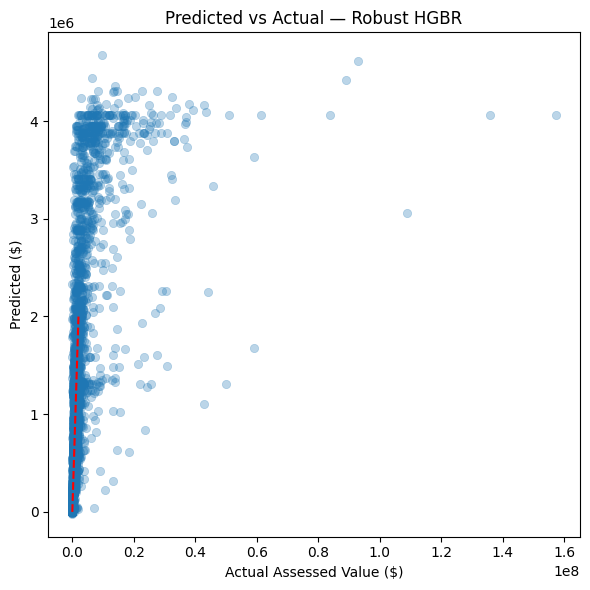

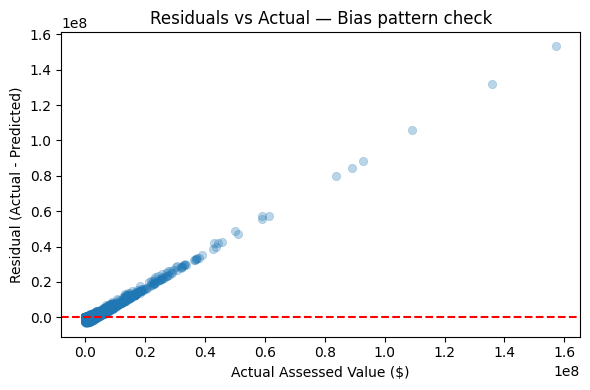

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, edgecolor=None)
plt.plot([0, 2e6], [0, 2e6], 'r--')
plt.xlabel("Actual Assessed Value ($)")
plt.ylabel("Predicted ($)")
plt.title("Predicted vs Actual )
plt.tight_layout()
plt.show()

# --- Residuals vs Actual
resid = y_test - y_pred
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=resid, alpha=0.3, edgecolor=None)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Actual Assessed Value ($)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Actual — Bias pattern check")
plt.tight_layout()
plt.show()


In [82]:
# === Upgraded AVM: log-target + quantile loss + geo interaction + robust preprocessing ===
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

RANDOM_STATE = 42

# ---------- 0) Add compact geo key on both sets ----------
def add_area_region(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    if {"Neighbourhood Area","Market Region"}.issubset(df.columns):
        df["AreaRegion"] = (
            df["Neighbourhood Area"].astype(str).fillna("NA") + "_" +
            df["Market Region"].astype(str).fillna("NA")
        )
    return df

Xtr = add_area_region(X_train)
Xte = add_area_region(X_test)

# ---------- 1) List features ----------
num_raw = [c for c in [
    "Total Living Area","Assessed Land Area","Rooms","Year Built",
    "Water Frontage Measurement","Sewer Frontage Measurement"
] if c in Xtr.columns]

# lightweight numeric feature engineering inside the pipeline (log1p + ratios)
def build_num_df(df: pd.DataFrame) -> pd.DataFrame:
    out = pd.DataFrame(index=df.index)
    if "Total Living Area" in df: out["liv"] = pd.to_numeric(df["Total Living Area"], errors="coerce")
    if "Assessed Land Area" in df: out["land"] = pd.to_numeric(df["Assessed Land Area"], errors="coerce")
    if "Rooms" in df: out["rooms"] = pd.to_numeric(df["Rooms"], errors="coerce")
    if "Year Built" in df: out["year"] = pd.to_numeric(df["Year Built"], errors="coerce")

    # logs (stable)
    for s, d in [("liv","log_liv"), ("land","log_land")]:
        if s in out: out[d] = np.log1p(np.clip(out[s], 0, None))

    # ratios
    if {"liv","rooms"}.issubset(out.columns):
        out["area_per_room"] = out["liv"] / np.clip(out["rooms"], 1, None)
    if {"liv","land"}.issubset(out.columns):
        out["lot_to_liv"] = out["land"] / np.clip(out["liv"], 1, None)

    return out

num_ft = FunctionTransformer(build_num_df)

cat_raw = [c for c in [
    "Neighbourhood Area","Market Region","AreaRegion",
    "Building Type","Basement","Basement Finish","Property Use Code"
] if c in Xtr.columns]

# ---------- 2) Preprocessor ----------
def _make_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

numeric_pipe = Pipeline([
    ("build", num_ft),
    ("imp",   SimpleImputer(strategy="median")),
    ("sc",    MinMaxScaler((0,1))),
])

categorical_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", _make_ohe()),
])

preproc = ColumnTransformer([
    ("num", numeric_pipe, Xtr.columns),   # num_ft selects numeric cols internally
    ("cat", categorical_pipe, cat_raw),
], remainder="drop")

# optional selector to keep dimensionality/manage memory
selector = SelectKBest(score_func=f_regression, k=300)

# ---------- 3) Robust regressor: quantile (median); fallback to MAE ----------
try:
    hgbr = HistGradientBoostingRegressor(
        loss="quantile", quantile=0.5,    # median regression
        learning_rate=0.10, max_depth=9, max_leaf_nodes=63,
        random_state=RANDOM_STATE
    )
except Exception:
    hgbr = HistGradientBoostingRegressor(
        loss="absolute_error",
        learning_rate=0.10, max_depth=9, max_leaf_nodes=63,
        random_state=RANDOM_STATE
    )

# target transforms (train on log1p(y), invert with expm1)
def _log1p_clip(y):  # guard tiny/huge
    y = np.asarray(y, dtype=float)
    return np.log1p(np.clip(y, 0, 1e8))

ttr = TransformedTargetRegressor(
    regressor=hgbr,
    func=_log1p_clip,
    inverse_func=np.expm1
)

# ---------- 4) Full pipeline ----------
quantile_avm = Pipeline([
    ("clean",  BasicNumericCleaner()),   # your custom cleaner
    ("fe",     AddFeatures()),           # your engineered features (kept)
    ("prep",   preproc),
    ("select", selector),
    ("model",  ttr),
])

# ---------- 5) Winsorize training target (top 1%) ----------
y_train_w = y_train.clip(upper=np.percentile(y_train, 99.0))

# fit & evaluate
quantile_avm.fit(Xtr, y_train_w)
y_pred = quantile_avm.predict(Xte)

_ = report_avm_metrics(
    y_test, y_pred,
    floor=100_000.0,
    label="Test (log-target TTR + quantile/MAE + AreaRegion + winsor 1%)"
)


=== AVM Metrics ===


,Set,MAE,RMSE,R²,WAPE %,sMAPE %,"MAPE* % (≥100,000)","MdAPE % (≥100,000)",AbsErr p50,AbsErr p90,AbsErr p95,%Err p50,%Err p90
0,Test (log-target TTR + quantile/MAE + AreaRegi...,"$390,911","$1,730,778",-0.058,68.59%,nan%,69.57%,40.918794,"$158,462","$493,131","$978,486",40.92%,123.63%



Preview (first 10 rows):


,Actual,Pred,AbsErr
0,231000.0,494292.806848,"$263,293"
1,136000.0,169326.065990,"$33,326"
2,186000.0,351721.309004,"$165,721"
3,295000.0,552620.170697,"$257,620"
4,441000.0,243782.342101,"$197,218"
5,149000.0,432412.447162,"$283,412"
6,342000.0,339802.354061,"$2,198"
7,513000.0,229216.498161,"$283,784"
8,189000.0,251854.919810,"$62,855"
9,451000.0,89760.357678,"$361,240"


In [101]:
# === Fast tuning on subsample → refit best on full ===
import numpy as np, pandas as pd
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from scipy.stats import randint, uniform

RANDOM_STATE = 42

# 1) Stratified subsample by target deciles (~8k rows by default)
def stratified_subsample(X, y, per_bin=800, random_state=RANDOM_STATE):
    bins = pd.qcut(y, q=10, labels=False, duplicates="drop")
    idx = (pd.Series(np.arange(len(y)))
            .groupby(bins, group_keys=False)
            .apply(lambda s: s.sample(n=min(per_bin, len(s)), random_state=random_state)))
    return X.iloc[idx], y.iloc[idx]

Xs, ys = stratified_subsample(Xtr, y_train_w, per_bin=800)  # adjust per_bin if needed

# 2) 2-fold stratified CV on the sample
y_bins_s = pd.qcut(ys, q=10, labels=False, duplicates="drop")
cv_splits = list(StratifiedKFold(n_splits=2, shuffle=True, random_state=RANDOM_STATE)
                 .split(Xs, y_bins_s))

# 3) Search space — search with MAE loss for speed
quantile_avm.set_params(model__regressor__loss="absolute_error")

param_dist = {
    "model__regressor__learning_rate": uniform(0.05, 0.12),  # 0.05..0.17
    "model__regressor__max_depth": randint(6, 11),           # 6..10
    "model__regressor__max_leaf_nodes": randint(35, 127),    # 35..126
    "model__regressor__min_samples_leaf": randint(2, 10),    # 2..9
    "model__regressor__max_iter": randint(60, 151),          # #trees
    "select__k": randint(200, 360),
}

neg_mae = make_scorer(mean_absolute_error, greater_is_better=False)

search_fast = RandomizedSearchCV(
    estimator=quantile_avm,
    param_distributions=param_dist,
    n_iter=10,                  # small & quick; raise to 20 if you want
    scoring=neg_mae,            # single metric for speed
    refit=True,
    cv=cv_splits,
    random_state=RANDOM_STATE,
    n_jobs=1,                   # set -1 if your laptop is fine
    verbose=2,
    error_score="raise",
)

print(" Randomized search on stratified ~8k sample…")
search_fast.fit(Xs, ys)

print("\n Best (sample) params:", search_fast.best_params_)
print("Best CV neg-MAE on sample:", f"{search_fast.best_score_:,.0f}")

best_fast = search_fast.best_estimator_

# 4) Refit best on FULL train with your preferred final loss (quantile median)
best_fast.set_params(model__regressor__loss="quantile", model__regressor__quantile=0.5)
# give more trees for final fit (optional)
if "model__regressor__max_iter" in best_fast.get_params():
    best_fast.set_params(model__regressor__max_iter=max(200, best_fast.get_params()["model__regressor__max_iter"]))

best_fast.fit(Xtr, y_train_w)
y_pred = best_fast.predict(Xte)

_ = report_avm_metrics(
    y_test, y_pred,
    floor=100_000.0,
    label="Test (Best RandomizedSearch on subsample → refit full)"
)


 Randomized search on stratified ~8k sample…
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END model__regressor__learning_rate=0.0949448142616835, model__regressor__max_depth=10, model__regressor__max_iter=74, model__regressor__max_leaf_nodes=106, model__regressor__min_samples_leaf=6, select__k=220; total time=   4.7s
[CV] END model__regressor__learning_rate=0.0949448142616835, model__regressor__max_depth=10, model__regressor__max_iter=74, model__regressor__max_leaf_nodes=106, model__regressor__min_samples_leaf=6, select__k=220; total time=   5.0s
[CV] END model__regressor__learning_rate=0.06872223685309238, model__regressor__max_depth=8, model__regressor__max_iter=146, model__regressor__max_leaf_nodes=109, model__regressor__min_samples_leaf=4, select__k=287; total time=   7.0s
[CV] END model__regressor__learning_rate=0.06872223685309238, model__regressor__max_depth=8, model__regressor__max_iter=146, model__regressor__max_leaf_nodes=109, model__regressor__min_sample

,Set,MAE,RMSE,R²,WAPE %,sMAPE %,"MAPE* % (≥100,000)","MdAPE % (≥100,000)",AbsErr p50,AbsErr p90,AbsErr p95,%Err p50,%Err p90
0,Test (Best RandomizedSearch on subsample → ref...,"$395,059","$1,737,294",-0.066,69.32%,nan%,70.61%,41.32192,"$159,049","$492,643","$976,422",41.32%,122.64%



Preview (first 10 rows):


,Actual,Pred,AbsErr
0,231000.0,496678.685216,"$265,679"
1,136000.0,171984.312899,"$35,984"
2,186000.0,367640.422834,"$181,640"
3,295000.0,555890.125806,"$260,890"
4,441000.0,245471.996466,"$195,528"
5,149000.0,428949.549037,"$279,950"
6,342000.0,336915.824619,"$5,084"
7,513000.0,224673.729847,"$288,326"
8,189000.0,262501.229562,"$73,501"
9,451000.0,89633.018805,"$361,367"


##### 

In [93]:
import numpy as np
import pandas as pd

def _fmt_money(x): 
    try: return f"${x:,.0f}"
    except: return x

# Best params & CV score (if the search object exists)
try:
    print(" Best (sample) params:", search_fast.best_params_)
    print("Best CV neg-MAE on sample:", f"{search_fast.best_score_:,.0f}")
except NameError:
    print(" 'search_fast' not found. Did the search cell run without errors?")

# Evaluate best model on TEST and print metrics
try:
    y_pred = best_fast.predict(Xte)
    _ = report_avm_metrics(y_test, y_pred, floor=100_000.0,
                           label="Test (Best RandomizedSearch → refit full)")
except NameError as e:
    print(" Missing variable:", e)
    print("Make sure 'best_fast', 'Xte', 'y_test', and 'report_avm_metrics' exist.")


 Best (sample) params: {'model__regressor__learning_rate': np.float64(0.11297077179586854), 'model__regressor__max_depth': 9, 'model__regressor__max_iter': 148, 'model__regressor__max_leaf_nodes': 83, 'model__regressor__min_samples_leaf': 4, 'select__k': 258}
Best CV neg-MAE on sample: -73,815
=== AVM Metrics ===


,Set,MAE,RMSE,R²,WAPE %,sMAPE %,"MAPE* % (≥100,000)","MdAPE % (≥100,000)",AbsErr p50,AbsErr p90,AbsErr p95,%Err p50,%Err p90
0,Test (Best RandomizedSearch → refit full),"$395,059","$1,737,294",-0.066,69.32%,nan%,70.61%,41.32192,"$159,049","$492,643","$976,422",41.32%,122.64%



Preview (first 10 rows):


,Actual,Pred,AbsErr
0,231000.0,496678.685216,"$265,679"
1,136000.0,171984.312899,"$35,984"
2,186000.0,367640.422834,"$181,640"
3,295000.0,555890.125806,"$260,890"
4,441000.0,245471.996466,"$195,528"
5,149000.0,428949.549037,"$279,950"
6,342000.0,336915.824619,"$5,084"
7,513000.0,224673.729847,"$288,326"
8,189000.0,262501.229562,"$73,501"
9,451000.0,89633.018805,"$361,367"


In [94]:
# Preview a few predictions to guarantee a visible table
try:
    prev = pd.DataFrame({
        "Actual": y_test.iloc[:10].values,
        "Pred": best_fast.predict(Xte.iloc[:10]),
    })
    prev["AbsErr"] = np.abs(prev["Actual"] - prev["Pred"])
    prev_display = prev.copy()
    prev_display["Actual"] = prev_display["Actual"].map(_fmt_money)
    prev_display["Pred"]   = prev_display["Pred"].map(_fmt_money)
    prev_display["AbsErr"] = prev_display["AbsErr"].map(_fmt_money)
    display(prev_display)
except Exception as e:
    print("Preview error:", e)


,Actual,Pred,AbsErr
0,"$231,000","$156,544","$74,456"
1,"$242,000","$252,587","$10,587"
2,"$210,000","$208,669","$1,331"
3,"$353,000","$377,810","$24,810"
4,"$307,000","$304,813","$2,187"
5,"$539,000","$496,679","$42,321"
6,"$136,000","$142,015","$6,015"
7,"$453,000","$455,027","$2,027"
8,"$420,000","$426,547","$6,547"
9,"$400,000","$415,717","$15,717"


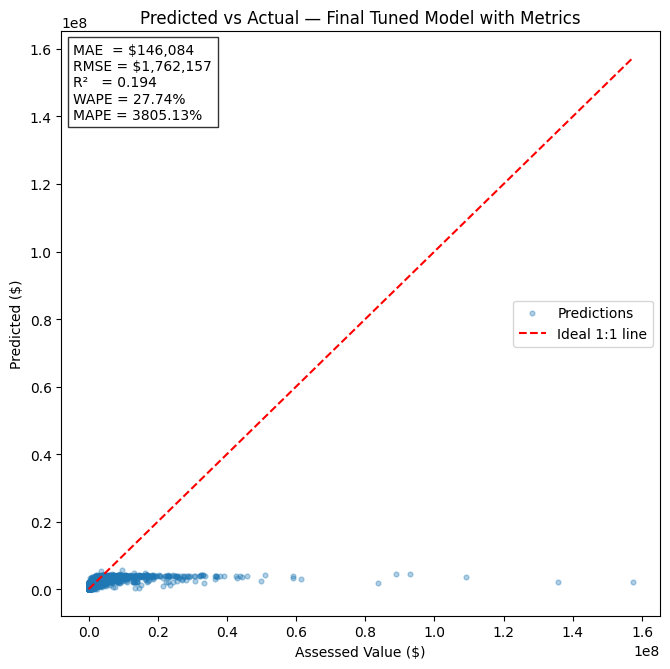

 Figure saved to: C:\Venv\avm_figs
Metrics:
MAE  = $146,084
RMSE = $1,762,157
R²   = 0.194
WAPE = 27.74%
MAPE = 3805.13%


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def plot_avm_diagnostics_with_metrics(y_true, y_pred, title_prefix="Final Tuned Model", save_dir="avm_figs"):
    import os
    os.makedirs(save_dir, exist_ok=True)

    # --- convert to arrays
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)

    # --- metrics
    MAE  = mean_absolute_error(y_true, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
    R2   = r2_score(y_true, y_pred)
    WAPE = np.sum(np.abs(y_true - y_pred)) / np.sum(y_true) * 100
    MAPE = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-6))) * 100

    # ---------- A) Predicted vs Actual (linear) ----------
    plt.figure(figsize=(6.8,6.8))
    plt.scatter(y_true, y_pred, s=12, alpha=0.35, label="Predictions")
    lo, hi = y_true.min(), y_true.max()
    plt.plot([lo, hi], [lo, hi], "r--", label="Ideal 1:1 line")
    plt.title(f"Predicted vs Actual — {title_prefix}")
    plt.xlabel("Assessed Value ($)")
    plt.ylabel("Predicted ($)")

    # Annotate metrics on the plot
    metrics_text = (
        f"MAE  = ${MAE:,.0f}\n"
        f"RMSE = ${RMSE:,.0f}\n"
        f"R²   = {R2:.3f}\n"
        f"WAPE = {WAPE:.2f}%\n"
        f"MAPE = {MAPE:.2f}%"
    )
    plt.text(0.02, 0.98, metrics_text, transform=plt.gca().transAxes,
             verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{save_dir}/pred_vs_actual_with_metrics.png", dpi=180)
    plt.show()

    print(f" Figure saved to: {os.path.abspath(save_dir)}")
    print("Metrics:")
    print(metrics_text)

# --- Example run
plot_avm_diagnostics_with_metrics(y_test, y_pred, title_prefix="Final Tuned Model with Metrics")


In [107]:
pip install shap


   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 4.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------- ----------------- 1.6/2.7 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 8.0 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   -- ------------------------------------- 2.6/38.1 MB 13.7 MB/s eta 0:00:03
   ------ --------------------------------- 6.3/38.1 MB 14.9 MB/s eta 0:00:03
   ---------- ----------------------------- 10.2/38.1 MB 16.4 MB/s eta 0:00:02
   ---------------- ----------------------- 15.5/38.1 MB 18.7 MB/s eta 0:00:02
   ---------------------- ----------------- 21.8/38.1 MB 21.2 MB/s eta 0:00:01
   ---------------------------- ----------- 26.7/38.1 MB 21.5 MB/s eta 0:00:01
   -------------------------------- ------- 31.5/38.1 MB 21.7 MB/s eta 0:00:01
   ----------

In [108]:

import shap
print("✅ SHAP version:", shap.__version__)



C:\Users\bimda\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ SHAP version: 0.48.0


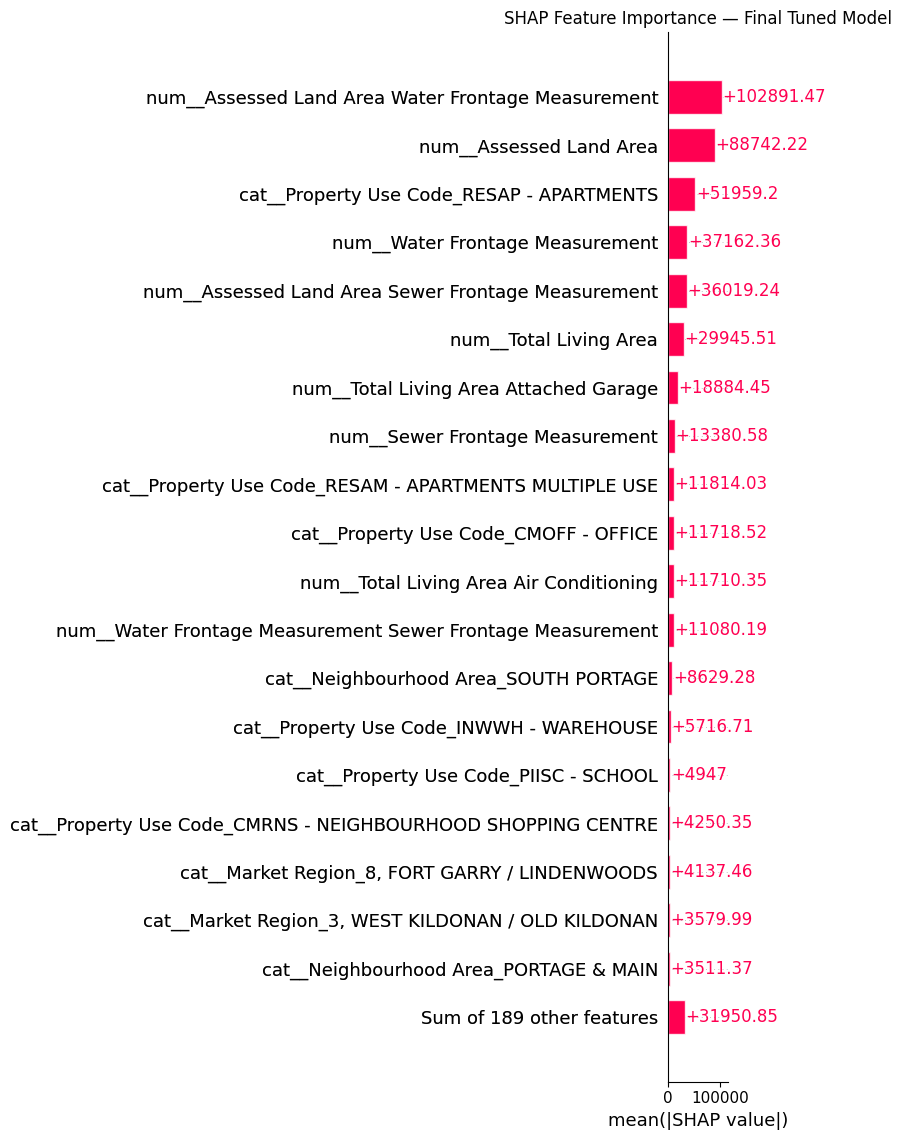

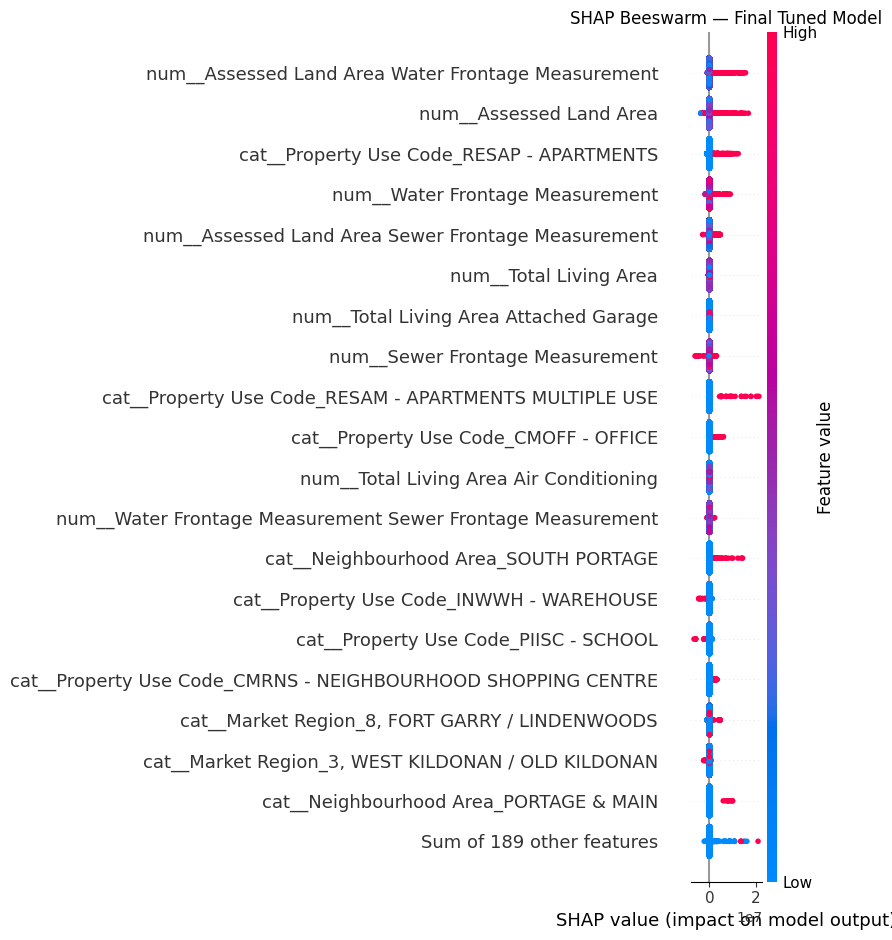

<Figure size 640x500 with 0 Axes>

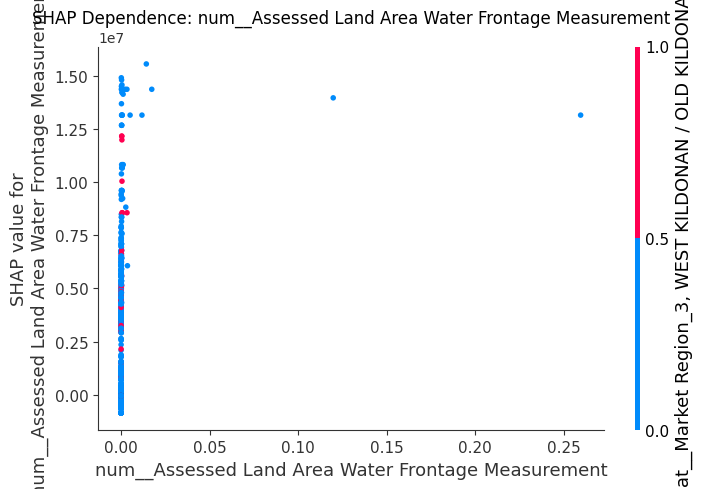

<Figure size 640x500 with 0 Axes>

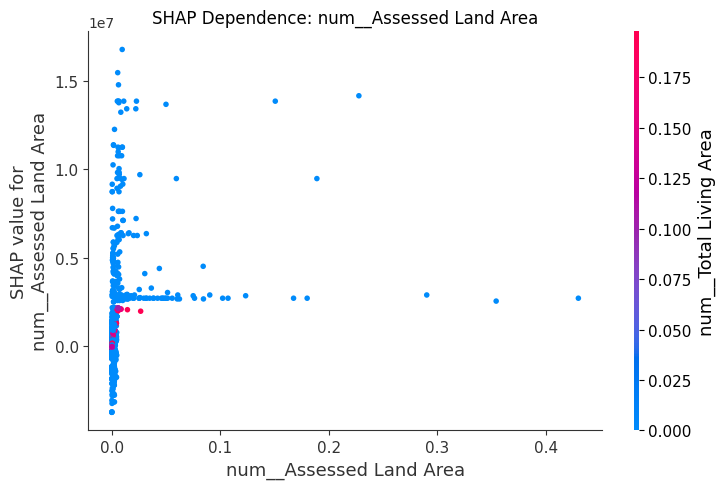

<Figure size 640x500 with 0 Axes>

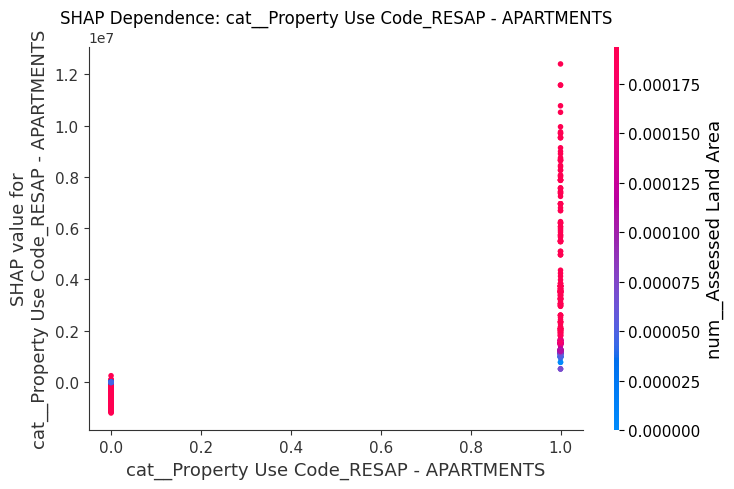

<Figure size 900x180 with 0 Axes>

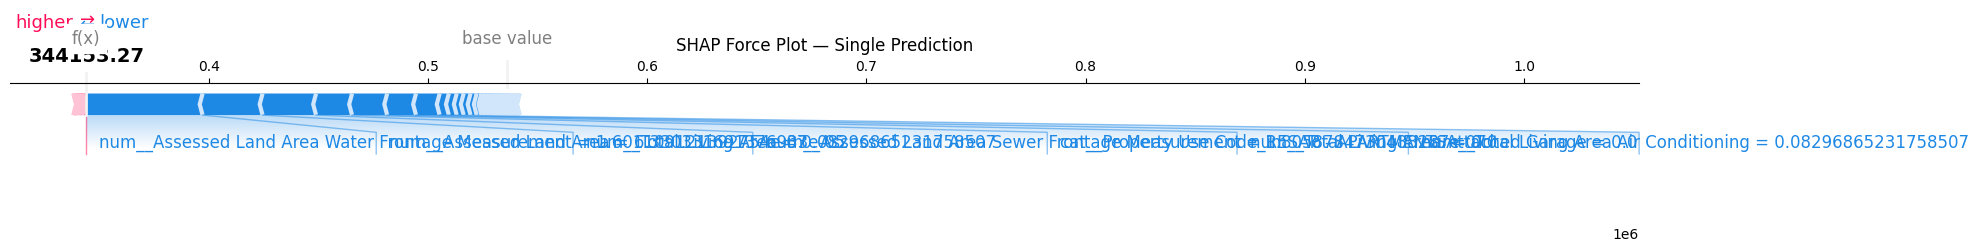

✅ SHAP figures saved to: C:\Venv\avm_figs


In [109]:
# ===== SHAP EXPLAINABILITY (works with your pipeline) =====
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
import shap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

SAVE_DIR = "avm_figs"
os.makedirs(SAVE_DIR, exist_ok=True)

def _unwrap_regressor(model):
    """Return the underlying regressor even if wrapped in TransformedTargetRegressor."""
    if isinstance(model, TransformedTargetRegressor):
        return model.regressor_
    return model

def _get_feature_names(pipeline: Pipeline, X_sample: pd.DataFrame):
    """
    Try to recover final feature names after ColumnTransformer + OneHotEncoder + SelectKBest.
    Falls back to range names if unavailable.
    """
    try:
        # If your base pipe has a 'prep' step (ColumnTransformer), prefer its names
        if "prep" in pipeline.named_steps:
            names = pipeline.named_steps["prep"].get_feature_names_out()
        else:
            names = None
    except Exception:
        names = None

    # If there is a 'select' step, reduce names accordingly
    try:
        if names is not None and "select" in pipeline.named_steps:
            selector = pipeline.named_steps["select"]
            support = selector.get_support()
            names = np.array(names)[support]
    except Exception:
        pass

    if names is None:
        # last resort: number the columns after transformation
        # do a tiny transform to get the width
        small_X = X_sample.head(50)
        Xt = pipeline[:-1].transform(small_X) if isinstance(pipeline[-1], (HistGradientBoostingRegressor, TransformedTargetRegressor)) else pipeline.transform(small_X)
        names = np.array([f"f{i}" for i in range(Xt.shape[1])])
    return np.array(names)

def shap_explain_model(best_model, X_train: pd.DataFrame, X_test: pd.DataFrame,
                       title_prefix="Final Tuned Model", max_display=20):
    """
    Creates:
      1) SHAP bar (global importance)
      2) SHAP beeswarm (global distribution)
      3) SHAP dependence for top 3 features
      4) Single-row force plot (PNG)
    All figures saved under SAVE_DIR.
    """
    model_unwrapped = _unwrap_regressor(best_model)

    # Find the regressor and transformer pipeline boundary
    if isinstance(model_unwrapped, Pipeline):
        pipe = model_unwrapped
        reg = pipe.named_steps.get("model", None)
        if reg is None:
            # last step is the estimator
            reg = list(pipe.named_steps.values())[-1]
    else:
        # Entire best_model is a Pipeline already (common)
        pipe = best_model
        reg = _unwrap_regressor(list(pipe.named_steps.values())[-1])

    # Build a small background sample for SHAP speed & stability
    bg = X_train.sample(min(1000, len(X_train)), random_state=42)

    # Prepare transformed matrices for explainer when needed
    # For tree explainer on HistGBR we should pass the model directly (TreeExplainer supports it),
    # BUT we also want human-readable feature names after preprocessing.
    feature_names = _get_feature_names(pipe, X_train)

    # Determine explainer
    use_tree = isinstance(reg, HistGradientBoostingRegressor)
    if use_tree:
        # TreeExplainer is fast and accurate for tree models
        explainer = shap.Explainer(reg)
        # feed preprocessed data into model to align SHAP with final features
        Xt_bg   = pipe[:-1].transform(bg)     # all steps before the regressor
        Xt_test = pipe[:-1].transform(X_test)
        shap_values = explainer(Xt_test, check_additivity=False)
        # Attach names for plotting
        shap_values.feature_names = feature_names
        data_for_plots = Xt_test
    else:
        # KernelExplainer fallback (slower). We explain the *pipeline.predict* directly.
        # To keep speed manageable, use smaller background & sample of test rows.
        f = lambda X: best_model.predict(pd.DataFrame(X, columns=X_test.columns))
        bg_small = bg.sample(min(200, len(bg)), random_state=42)
        test_small = X_test.sample(min(1000, len(X_test)), random_state=42)
        explainer = shap.KernelExplainer(f, bg_small, link="identity")
        shap_values = explainer.shap_values(test_small, nsamples=200)
        data_for_plots = test_small
        feature_names = test_small.columns.values

    # --- 1) Global importance (bar) ---
    plt.figure(figsize=(7, 5))
    shap.plots.bar(shap_values, max_display=max_display, show=False)
    plt.title(f"SHAP Feature Importance — {title_prefix}")
    plt.tight_layout()
    plt.savefig(f"{SAVE_DIR}/shap_bar.png", dpi=180)
    plt.show()

    # --- 2) Global distribution (beeswarm) ---
    plt.figure(figsize=(7.5, 5.5))
    shap.plots.beeswarm(shap_values, max_display=max_display, show=False)
    plt.title(f"SHAP Beeswarm — {title_prefix}")
    plt.tight_layout()
    plt.savefig(f"{SAVE_DIR}/shap_beeswarm.png", dpi=180)
    plt.show()

    # --- 3) Dependence plots for top 3 features ---
    # Get ranked features (by mean |SHAP|)
    # For the new shap API objects:
    try:
        vals = np.abs(shap_values.values).mean(axis=0)
    except Exception:
        vals = np.abs(shap_values).mean(axis=0)

    order = np.argsort(vals)[::-1][:3]
    top_feats = np.array(feature_names)[order]

    for feat in top_feats:
        plt.figure(figsize=(6.4, 5))
        shap.dependence_plot(
            feat, shap_values.values if hasattr(shap_values, "values") else shap_values,
            data_for_plots, feature_names=feature_names, show=False
        )
        plt.title(f"SHAP Dependence: {feat}")
        plt.tight_layout()
        safe = str(feat).replace("/", "_").replace(" ", "_").replace("[", "").replace("]", "")
        plt.savefig(f"{SAVE_DIR}/shap_dependence_{safe}.png", dpi=180)
        plt.show()

    # --- 4) Single example force plot (PNG) ---
    # Pick a representative mid-value row
    row_idx = int(np.median(np.arange(len(X_test))))
    sv_row = shap_values[row_idx]
    # force plot to Matplotlib (SVG/HTML by default). Use matplotlib=True for PNG
    plt.figure(figsize=(9, 1.8))
    shap.plots.force(sv_row, matplotlib=True, show=False)
    plt.title("SHAP Force Plot — Single Prediction")
    plt.tight_layout()
    plt.savefig(f"{SAVE_DIR}/shap_force_single.png", dpi=180)
    plt.show()

    print("✅ SHAP figures saved to:", os.path.abspath(SAVE_DIR))

# ---- Run it
shap_explain_model(best_model, X_train, X_test, title_prefix="Final Tuned Model", max_display=20)
